# Delta of D

3.46677172340924588667 3.75572623000000005433
3.46677172340931605277 3.75572600000000011988
3.46677172340940487061 3.75572621000000017588
3.46677172340977080012 3.75572622000000011511


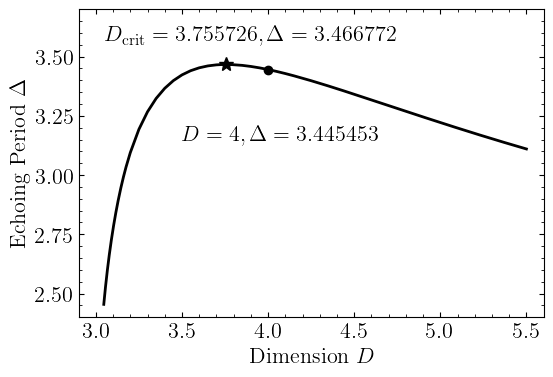

In [2]:
import numpy as np
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.colors as mcolors
from matplotlib.colors import BoundaryNorm, ListedColormap
from matplotlib import ticker
from scipy.optimize import curve_fit
from pylab import *
from scipy import ndimage

# LaTeX font
plt.rcParams.update({
    "text.usetex": True,
    'font.size': 16
    })


# high resolution
Delta=np.loadtxt("DeltaList.dat")
sorted_Delta = Delta[Delta[:, 1].argsort()]
for row in sorted_Delta[-4:]:
    print("{:.20f}".format(row[1]),"{:.20f}".format(row[0]))


# data from Bland paper Table 1 https : // arxiv . org/pdf/hep - th/0702226
SO=np.loadtxt("DeltaSorkin.dat")
# data from Blands thesis
bland1=np.loadtxt("DeltaBlandThesis.dat")
# data from Bland paper Table 1 https : // arxiv . org/pdf/gr - qc/0507088
bland2=np.loadtxt("DeltaBlandPaper1.dat")
# data from Bland paper Table 1 https : // arxiv . org/pdf/hep - th/0702226
bland3=np.loadtxt("DeltaBlandPaper2.dat")


# small D fit
#x=np.arange(3,3.25,0.01)
#fit=-57.051+35.2876*x-5.15404*x**2

# critical point
Dcrit=sorted_Delta[-1][0]
Deltacrit=sorted_Delta[-1][1]

# D=4
Delta4=Delta[Delta[:, 0] == 4][0][1]

# generating a figure
fig, ax=plt.subplots(sharex=True,facecolor='white',dpi=100,figsize=(6,4))
ax.set_xlim([2.9,5.6])
ax.set_ylim([2.4,3.7])
ax.tick_params(which='major', direction='in',top="true",right="true")
ax.tick_params(which='minor', direction='in',top="true",right="true")
ax.minorticks_on()
plt.xlabel(r'${\rm Dimension}~D$', fontsize = 16)
plt.ylabel(r'${\rm Echoing~Period}~\Delta$',fontsize =  16)


# high res
plt.plot(Delta[:,0],Delta[:,1],color="black",linestyle="-",linewidth=2,zorder=1,alpha=1,label=r"$\rm this~work$")

# low res
#plt.plot(DeltaLR[:,0],DeltaLR[:,1],color="orange",linestyle="--",linewidth=2,zorder=2,alpha=0.75,label=r"$2500~\rm modes$")

# low D fit
#plt.plot(extrapD3[:,0],extrapD3[:,1],color="black",linestyle=":",linewidth=2,zorder=1,alpha=0.5,label=r"$\rm extrapolation$")

#plt.plot(x,fit,color="black",linestyle=":",linewidth=2,zorder=1,alpha=0.5,label=r"$\rm extrapolation$")

# critical D
#plt.plot(DcritLR, DeltacritLR,'*',color="firebrick",markersize=10,alpha=0.75)
plt.plot(Dcrit, Deltacrit,'*',color="black",markersize=10,alpha=1,zorder=2)


# D=4
plt.plot(4, Delta4,'o',color="black")

# D=3
#plt.plot(3, Delta3,'o',color="black")

# labels
plt.text(Dcrit-0.7,Deltacrit+0.1,rf'$D_{{\rm crit}}={Dcrit:.6f}, \Delta={Deltacrit:.6f}$',fontsize=16,color="black")
plt.text(4-0.5,Delta4-0.3,rf'$D=4, \Delta={Delta4:.6f}$',fontsize=16,color="black")
#plt.text(3+0.1,Delta3,r'$\Delta(D=3^+)\approx 2.2(?)$',fontsize=16,color="black")
#plt.legend(loc="upper right",fontsize=14,frameon=False)

plt.savefig("Delta.pdf",dpi=100,bbox_inches='tight')

# Inflection point

Minimum of dΔ/dD for D < 4.79 at D ≈ 4.68000000, (dΔ/dD)_min ≈ -0.24049928


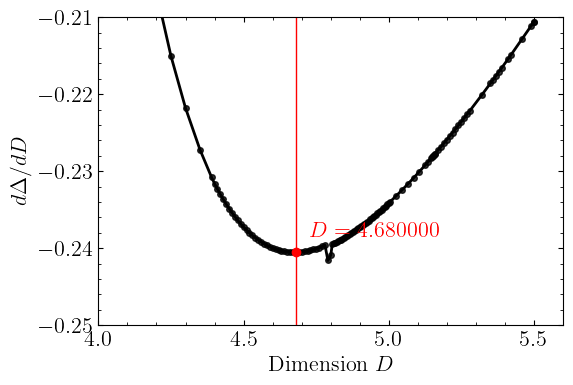

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# LaTeX font
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 16
})

# --------------------------------------------------
# Load + sort data
# --------------------------------------------------
Delta = np.loadtxt("DeltaList.dat")
sorted_Delta = Delta[Delta[:, 0].argsort()]   # sort by D (column 0)

D = sorted_Delta[::, 0]
Del = sorted_Delta[::, 1]

# --------------------------------------------------
# Numerical derivative dΔ/dD
# --------------------------------------------------
dDel_dD = np.gradient(Del, D)

# Optional smoothing (recommended if derivative is noisy):
# from scipy.ndimage import gaussian_filter1d
# Del_smooth = gaussian_filter1d(Del, sigma=1.0)
# dDel_dD = np.gradient(Del_smooth, D)

# --------------------------------------------------
# Locate minimum of dΔ/dD for D < 4.79
# --------------------------------------------------
D_max_search = 4.79
mask = D < D_max_search

if not np.any(mask):
    raise ValueError("No data points with D < 4.79")

imin_masked = np.argmin(dDel_dD[mask])

D_min = D[mask][imin_masked]
dDel_dD_min = dDel_dD[mask][imin_masked]

print(
    f"Minimum of dΔ/dD for D < {D_max_search} "
    f"at D ≈ {D_min:.8f}, (dΔ/dD)_min ≈ {dDel_dD_min:.8f}"
)

# --------------------------------------------------
# Reference points (same as your Delta plot)
# --------------------------------------------------
Dcrit = D[-1]
Deltacrit = Del[-1]
Delta4 = Delta[Delta[:, 0] == 4][0][1]

# Derivative at D=4 (using nearest grid point)
i4 = np.argmin(np.abs(D - 4.0))
dDel_dD_4 = dDel_dD[i4]

# --------------------------------------------------
# Plot
# --------------------------------------------------
fig, ax = plt.subplots(sharex=True, facecolor="white", dpi=100, figsize=(6, 4))

ax.set_xlim([4, 5.6])
ax.set_ylim([-0.25, -0.21])
ax.tick_params(which="major", direction="in", top=True, right=True)
ax.tick_params(which="minor", direction="in", top=True, right=True)
ax.minorticks_on()

plt.xlabel(r"${\rm Dimension}~D$", fontsize=16)
plt.ylabel(r"$d\Delta/dD$", fontsize=16)

# main curve
plt.plot(D, dDel_dD, color="black", linestyle="-", linewidth=2,
         zorder=1, alpha=1, label=r"$\rm this~work$")

# mark D=4
plt.plot(4.0, dDel_dD_4, "o", color="black", zorder=2)

# --------------------------------------------------
# Mark minimum of derivative
# --------------------------------------------------
ax.axvline(D_min, color="red", linewidth=1, linestyle="-", zorder=2)
plt.plot(D_min, dDel_dD_min, "o", color="red", zorder=3)

ax.text(
    D_min + 0.05,
    dDel_dD_min + 0.05*(ax.get_ylim()[1] - ax.get_ylim()[0]),
    rf"$D={D_min:.6f}$",
    fontsize=16,
    color="red"
)

# show data points of the curve
plt.plot(
    D, dDel_dD,
    linestyle="None",
    marker="o",
    markersize=4,
    color="black",
    zorder=2,
    alpha=0.8
)

plt.savefig("Delta_derivative_minimum.pdf", dpi=100, bbox_inches="tight")
plt.show()


# Delta of D comparison

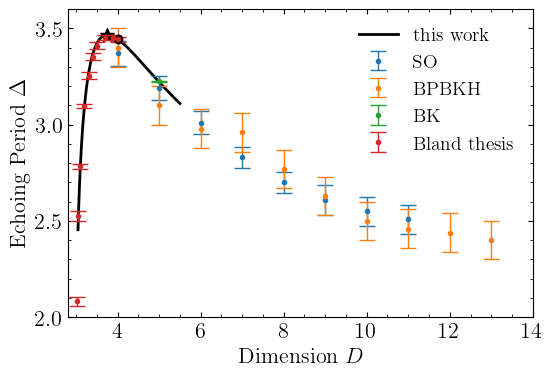

In [3]:
import numpy as np
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.colors as mcolors
from matplotlib.colors import BoundaryNorm, ListedColormap
from matplotlib import ticker
from scipy.optimize import curve_fit
from pylab import *
from scipy import ndimage

# LaTeX font
plt.rcParams.update({
    "text.usetex": True,
    'font.size': 16
    })


# high resolution
Delta=np.loadtxt("DeltaList.dat")

# data from Bland paper Table 1 https : // arxiv . org/pdf/hep - th/0702226
SO=np.loadtxt("DeltaSorkin.dat")
# data from Blands thesis
bland1=np.loadtxt("DeltaBlandThesis.dat")
# data from Bland paper Table 1 https : // arxiv . org/pdf/gr - qc/0507088
bland2=np.loadtxt("DeltaBlandPaper1.dat")
# data from Bland paper Table 1 https : // arxiv . org/pdf/hep - th/0702226
bland3=np.loadtxt("DeltaBlandPaper2.dat")


# small D fit
#x=np.arange(3,3.25,0.01)
#fit=-57.051+35.2876*x-5.15404*x**2

# critical point
DcritLR=3.7536
DeltacritLR=3.46677
DcritHR=3.7536
DeltacritHR=3.46676

# D=4
Delta4=3.44545

# generating a figure
fig, ax=plt.subplots(sharex=True,facecolor='white',dpi=100,figsize=(6,4))
ax.set_xlim([2.8,14])
ax.set_ylim([2.,3.6])
ax.tick_params(which='major', direction='in',top="true",right="true")
ax.tick_params(which='minor', direction='in',top="true",right="true")
ax.minorticks_on()
plt.xlabel(r'${\rm Dimension}~D$', fontsize = 16)
plt.ylabel(r'${\rm Echoing~Period}~\Delta$',fontsize =  16)


# high res
plt.plot(Delta[:,0],Delta[:,1],color="black",linestyle="-",linewidth=2,zorder=1,alpha=1,label=r"$\rm this~work$")

# low res
#plt.plot(DeltaLR[:,0],DeltaLR[:,1],color="orange",linestyle="--",linewidth=2,zorder=2,alpha=0.75,label=r"$2500~\rm modes$")

# low D fit
#plt.plot(extrapD3[:,0],extrapD3[:,1],color="black",linestyle=":",linewidth=2,zorder=1,alpha=0.5,label=r"$\rm extrapolation$")

#plt.plot(x,fit,color="black",linestyle=":",linewidth=2,zorder=1,alpha=0.5,label=r"$\rm extrapolation$")

# critical D
#plt.plot(DcritLR, DeltacritLR,'*',color="firebrick",markersize=10,alpha=0.75)
plt.plot(DcritHR, DeltacritHR,'*',color="black",markersize=10,alpha=1,zorder=2)

# eror bars in literature
plt.errorbar(SO[:,0],SO[:,1], yerr=SO[:,2], fmt='o',markersize=3, capsize=6,zorder=2,linewidth=1, label=r"$\rm SO$")
plt.errorbar(bland2[:,0],bland2[:,1], yerr=bland2[:,2], fmt='o',markersize=3, capsize=6,zorder=2,linewidth=1, label=r"$\rm BPBKH$")
plt.errorbar(bland3[0],bland3[1], yerr=bland3[2], fmt='o',markersize=3, capsize=6,zorder=2,linewidth=1, label=r"$\rm BK$")
#plt.errorbar(AG[0],AG[1], yerr=AG[2], fmt='o',markersize=3, capsize=6,zorder=2,linewidth=1, label=r"$\rm Ref.[4]$")
plt.errorbar(bland1[:,0],bland1[:,1], yerr=bland1[:,2], fmt='o',markersize=3, capsize=6,zorder=2,linewidth=1, label=r"$\rm Bland~thesis$")

# D=4
plt.plot(4, Delta4,'o',color="black")

# D=3
#plt.plot(3, Delta3,'o',color="black")

# labels
#plt.text(DcritLR-0.5,DeltacritLR+0.1,r'$D_{\rm crit}=3.7536, \Delta=3.4668$',fontsize=16,color="black")
#plt.text(4-0.2,Delta4-0.3,r'$D=4, \Delta=3.4455$',fontsize=16,color="black")
#plt.text(3+0.1,Delta3,r'$\Delta(D=3^+)\approx 2.2(?)$',fontsize=16,color="black")
plt.legend(loc="upper right",fontsize=14,frameon=False)

plt.savefig("DeltaCompare.pdf",dpi=100,bbox_inches='tight')

# gamma of D

0.3739606640604697
0.3543423330020213


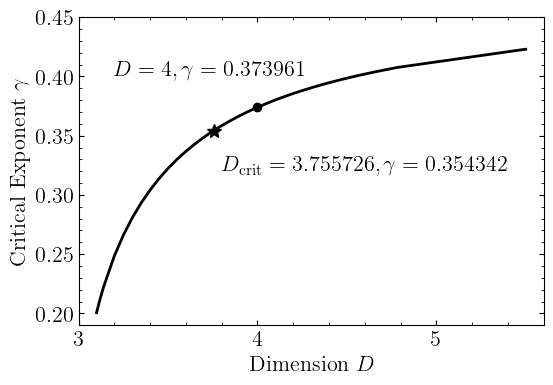

In [4]:
import numpy as np
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.colors as mcolors
from matplotlib.colors import BoundaryNorm, ListedColormap
from matplotlib import ticker
from scipy.optimize import curve_fit
from pylab import *
from scipy import ndimage

# LaTeX font
plt.rcParams.update({
    "text.usetex": True,
    'font.size': 16
    })

# numeric data for gamma 
gamma=np.loadtxt("GammaList.dat")

# data from Bland paper Table 1 https : // arxiv . org/pdf/hep - th/0702226
SO=np.loadtxt("gSorkin.dat")
# data from Bland paper Table 1 https : // arxiv . org/pdf/hep - th/0502034
AG=np.loadtxt("gAlvarez.dat")
# data from Blands thesis
bland1=np.loadtxt("gBlandThesis.dat")
# data from Bland paper Table 1 https : // arxiv . org/pdf/gr - qc/0507088
bland2=np.loadtxt("gBlandPaper1.dat")
# data from Bland paper Table 1 https : // arxiv . org/pdf/hep - th/0702226
bland3=np.loadtxt("gBlandPaper2.dat")

# D=4
gamma4=gamma[gamma[:, 0] == 4][0][1]
print(gamma4)

# Critical D
gammaCrit=gamma[gamma[:, 0] == 3.75572623][0][1]
print(gammaCrit)

# generating a figure
fig, ax=plt.subplots(sharex=True,facecolor='white',dpi=100,figsize=(6,4))
ax.set_xlim([3,5.6])
ax.set_ylim([0.19,0.45])
ax.tick_params(which='major', direction='in',top="true",right="true")
ax.tick_params(which='minor', direction='in',top="true",right="true")
ax.minorticks_on()
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
plt.xlabel(r'${\rm Dimension}~D$', fontsize = 16)
plt.ylabel(r'${\rm Critical~Exponent}~\gamma$',fontsize =  16)

# gamma
plt.plot(gamma[:,0],gamma[:,1],color="black",linestyle="-",linewidth=2,zorder=1,alpha=1,label=r"$\rm this~work$")

#plt.plot(bland[:,0],bland[:,1],color="blue",linestyle="--",linewidth=2,zorder=2,alpha=0.75,label=r"$\rm Bland$")

# D=4
plt.plot(4, gamma4,'o',color="black")

plt.plot(Dcrit, gammaCrit,'*',color="black",markersize=10,alpha=1,zorder=2)

# labels
plt.text(3.2,0.4,rf'$D=4, \gamma={gamma4:.6f}$',fontsize=16,color="black")
plt.text(3.8,0.32,rf'$D_{{\rm crit}}={Dcrit:.6f}, \gamma={gammaCrit:.6f}$',fontsize=16,color="black")

#plt.legend(loc="lower right",fontsize=14,frameon=False)

plt.savefig("gamma.pdf",dpi=100,bbox_inches='tight')

# gamma of D comparison

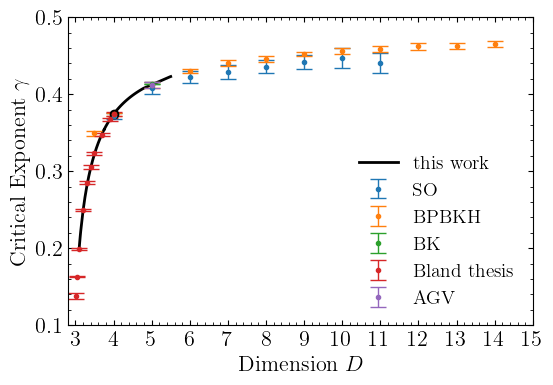

In [5]:
import numpy as np
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.colors as mcolors
from matplotlib.colors import BoundaryNorm, ListedColormap
from matplotlib import ticker
from scipy.optimize import curve_fit
from pylab import *
from scipy import ndimage

# LaTeX font
plt.rcParams.update({
    "text.usetex": True,
    'font.size': 16
    })

# numeric data for gamma 
gamma=np.loadtxt("GammaList.dat")

# data from SO paper Table 1 https : arXiv:hep-th/0502034
SO=np.loadtxt("gSorkin.dat")
# data from ? paper Table 1 https : // arxiv . org/pdf/hep - th/0502034
AG=np.loadtxt("gAlvarez.dat")
# data from Blands thesis
bland1=np.loadtxt("gBlandThesis.dat")
# data from Bland paper Table 1 https : arXiv:gr-qc/0507088
bland2=np.loadtxt("gBlandPaper1.dat")
# data from Bland paper Table 1 https : hep-th/0702226
bland3=np.loadtxt("gBlandPaper2.dat")

gamma4=0.373961

# generating a figure
fig, ax=plt.subplots(sharex=True,facecolor='white',dpi=100,figsize=(6,4))
ax.set_xlim([2.8,15])
ax.set_ylim([0.1,0.5])
ax.tick_params(which='major', direction='in',top="true",right="true")
ax.tick_params(which='minor', direction='in',top="true",right="true")
ax.minorticks_on()
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
plt.xlabel(r'${\rm Dimension}~D$', fontsize = 16)
plt.ylabel(r'${\rm Critical~Exponent}~\gamma$',fontsize =  16)

# gamma
plt.plot(gamma[:,0],gamma[:,1],color="black",linestyle="-",linewidth=2,zorder=1,alpha=1,label=r"$\rm this~work$")

# eror bars in literature
plt.errorbar(SO[:,0],SO[:,1], yerr=SO[:,2], fmt='o',markersize=3, capsize=6,zorder=2,linewidth=1, label=r"$\rm SO$")
plt.errorbar(bland2[:,0],bland2[:,1], yerr=bland2[:,2], fmt='o',markersize=3, capsize=6,zorder=2,linewidth=1, label=r"$\rm BPBKH$")
plt.errorbar(bland3[0],bland3[1], yerr=bland3[2], fmt='o',markersize=3, capsize=6,zorder=2,linewidth=1, label=r"$\rm BK$")
plt.errorbar(bland1[:,0],bland1[:,1], yerr=bland1[:,2], fmt='o',markersize=3, capsize=6,zorder=2,linewidth=1, label=r"$\rm Bland~thesis$")
plt.errorbar(AG[0],AG[1], yerr=AG[2], fmt='o',markersize=3, capsize=6,zorder=2,linewidth=1, label=r"$\rm AGV$")

#plt.plot(bland[:,0],bland[:,1],color="blue",linestyle="--",linewidth=2,zorder=2,alpha=0.75,label=r"$\rm Bland$")

# D=4
plt.plot(4, gamma4,'o',color="black")

# labels
#plt.text(4-0.2,gamma4+0.03,r'$D=4, \gamma\approx0.37$',fontsize=16,color="black")
plt.legend(loc="lower right",fontsize=14,frameon=False)

plt.savefig("gammaCompare.pdf",dpi=100,bbox_inches='tight')

# Delta loglog plot for large D

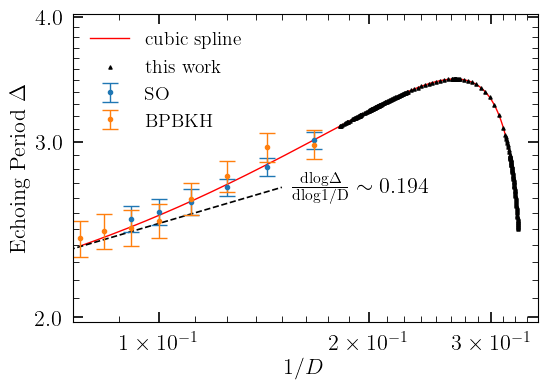

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator


import numpy as np
from scipy.interpolate import UnivariateSpline

def weighted_spline_samples(keys, values, errors, n_samples=300, k=3, s=None):
    """
    keys   : x-values (list/array)
    values : y-values (list/array)
    errors : 1σ y-errors (list/array), used as weights (smaller error => higher weight)
    n_samples: number of equally spaced x-samples to return
    k      : spline degree (3=cubic)
    s      : smoothing factor. If None, use ~N (good starting point when errors are 1σ).
             Use s=0 for (near-)interpolating behavior (can overfit noisy data).
    Returns: xx (equidistant), yy (spline evaluated), spline object
    """
    x = np.asarray(keys, dtype=float)
    y = np.asarray(values, dtype=float)
    sig = np.asarray(errors, dtype=float)

    # Basic cleaning
    m = np.isfinite(x) & np.isfinite(y) & np.isfinite(sig) & (sig > 0)
    x, y, sig = x[m], y[m], sig[m]
    if x.size < (k + 1):
        raise ValueError(f"Need at least {k+1} valid points for a degree-{k} spline; got {x.size}.")

    # Sort by x (required)
    idx = np.argsort(x)
    x, y, sig = x[idx], y[idx], sig[idx]

    # Handle duplicate x-values by averaging (weighted by 1/sigma^2)
    # (UnivariateSpline requires strictly increasing x)
    uniq_x, inv = np.unique(x, return_inverse=True)
    if uniq_x.size != x.size:
        w2 = 1.0 / (sig**2)
        y_acc = np.zeros_like(uniq_x, dtype=float)
        w_acc = np.zeros_like(uniq_x, dtype=float)
        sig_acc = np.zeros_like(uniq_x, dtype=float)

        for i, j in enumerate(inv):
            y_acc[j] += y[i] * w2[i]
            w_acc[j] += w2[i]

        y_new = y_acc / w_acc
        # Combine errors at duplicates (for weighting): sigma_eff = 1/sqrt(sum(1/sigma^2))
        sig_new = 1.0 / np.sqrt(w_acc)

        x, y, sig = uniq_x, y_new, sig_new

    # Weights for UnivariateSpline: w = 1/sigma  (NOT 1/sigma^2)
    w = 1.0 / sig

    if s is None:
        s = len(x)  # good default when errors are meaningful 1σ

    spl = UnivariateSpline(x, y, w=w, s=s, k=k)

    # 300 equidistant samples over the x-range
    xx = np.linspace(x.min(), x.max(), n_samples)
    yy = spl(xx)
    return xx, yy, spl
                

# ---------------- LaTeX + font ----------------
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 16
})

# ---------------- Load data ----------------
logdelta = np.loadtxt("deltalargeD.dat")
deltadat = np.loadtxt("DeltaList.dat")

# Load the two papers that have largeD data together with errors
SO=np.loadtxt("DeltaSorkin.dat")[2:]
bland2=np.loadtxt("DeltaBlandPaper1.dat")[2:]

# compute mean values for those values of delta and error that are given for the same dimension
deltamean_paper = 0.5 * (SO[:, 1] + bland2[:-2, 1])   # numpy array
errmean_paper   = 0.5 * (SO[:, 2] + bland2[:-2, 2])   # numpy array

#---------INTERPOLATION------------------
# concatenate all the data
xdata = np.concatenate([1/bland2[:,0],1/deltadat[:,0]])
ydata = np.concatenate([bland2[-2:,1],deltamean_paper,deltadat[:,1]]) 
err = np.concatenate([bland2[-2:,2],errmean_paper,[0.00001]*len(deltadat)])

# we are interested in an upper bound for the tangent inclination at the smalles 1/D
# therefore, take as y data for the interpolation always the lowest consistent values in the given error bound
# the errors are then set small but we plot them later in terms of correct error bars
ydata = ydata-2*err
errmod = [0.00001]*len(ydata)

xx, yy, spl = weighted_spline_samples(xdata, ydata, err, n_samples=300, s=None)

# ---------------- Figure ----------------
fig, ax = plt.subplots(
    facecolor='white',
    dpi=100,
    figsize=(6, 4)
)

# ---------------- Log–log axes ----------------
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(0.08, 0.35)
ax.set_ylim(1.98, 4.03)

xtickstotal = np.linspace(0.075,0.35,23).tolist()
ytickstotal = np.linspace(2,4,23).tolist()

ax.set_xticks([0.1,0.2,0.3], minor=False)
ax.set_xticks([x for x in xtickstotal if x not in [0.1,0.2,0.3]], minor=True)
ax.set_xticklabels([r'$1\times 10^{-1}$',r'$2\times 10^{-1}$',r'$3\times 10^{-1}$'])

ax.set_yticks([2,3,4], minor=False)
ax.set_yticks([y for y in ytickstotal if y not in [2,3,4]], minor=True)
ax.set_yticklabels([r'$2.0$',r'$3.0$',r'$4.0$'])


# ---------------- Tick styling (standard log ticks) ----------------
ax.tick_params(which='major', direction='in', top=True, right=True, length=7, width=1.2)
ax.tick_params(which='minor', direction='in', top=True, right=True, length=4)
ax.tick_params(which="minor", labelbottom=False, labelleft=False)
ax.tick_params(which="major",pad=7)

# ---------------- Labels ----------------
ax.set_xlabel(r'$1/D$')
ax.set_ylabel(r'${\rm Echoing~Period}~\Delta$')

# ---------------- Plot ----------------
ax.plot(
    xx,
    yy,
    color="red",
    linestyle="-",
    linewidth=1,
    label=r'$\rm cubic~spline $'
)

ax.plot(
    [0.07,0.15],
    [2.31,2.7],
    color="black",
    linestyle="--",
    linewidth=1.2
)
ax.annotate(
    r"$\frac{\rm{d}log\Delta }{\rm{d}log 1/D}\sim 0.194$",
    xy=(0.15, 2.2),        # data coordinates
    xytext=(0.155, 2.6),
    textcoords="data",
    ha="left",
    va="bottom",
    fontsize=16
)

plt.scatter(1/deltadat[:,0],deltadat[:,1],s=5, marker='^', color="black",zorder=10, label=r'$\rm{this~work}$')


# error bars in literature
plt.errorbar(1/SO[:,0],SO[:,1], yerr=SO[:,2], fmt='o',markersize=3, capsize=6,zorder=2,linewidth=1, label=r"$\rm SO$")
plt.errorbar(1/bland2[:,0],bland2[:,1], yerr=bland2[:,2], fmt='o',markersize=3, capsize=6,zorder=2,linewidth=1, label=r"$\rm{BPBKH}$")
#plt.errorbar(bland3[0],bland3[1], yerr=bland3[2], fmt='o',markersize=3, capsize=6,zorder=2,linewidth=1, label=r"$\rm Ref.[3]$")
#plt.errorbar(AG[0],AG[1], yerr=AG[2], fmt='o',markersize=3, capsize=6,zorder=2,linewidth=1, label=r"$\rm Ref.[4]$")
#plt.errorbar(bland1[:,0],bland1[:,1], yerr=bland1[:,2], fmt='o',markersize=3, capsize=6,zorder=2,linewidth=1, label=r"$\rm Bland~thesis$")

plt.legend(loc="upper left",fontsize=14,frameon=False)

# ---------------- Save ----------------
plt.savefig("logdeltalargeD.pdf", dpi=200, bbox_inches='tight')



# Delta loglog plot for small D with Bland

0.21604171763143964


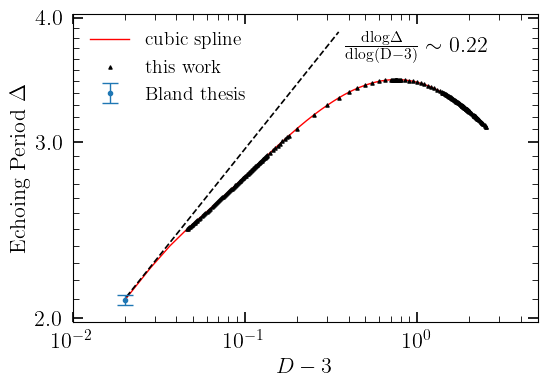

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator


import numpy as np
from scipy.interpolate import UnivariateSpline

def weighted_spline_samples(keys, values, errors, n_samples=300, k=3, s=None):
    """
    keys   : x-values (list/array)
    values : y-values (list/array)
    errors : 1σ y-errors (list/array), used as weights (smaller error => higher weight)
    n_samples: number of equally spaced x-samples to return
    k      : spline degree (3=cubic)
    s      : smoothing factor. If None, use ~N (good starting point when errors are 1σ).
             Use s=0 for (near-)interpolating behavior (can overfit noisy data).
    Returns: xx (equidistant), yy (spline evaluated), spline object
    """
    x = np.asarray(keys, dtype=float)
    y = np.asarray(values, dtype=float)
    sig = np.asarray(errors, dtype=float)

    # Basic cleaning
    m = np.isfinite(x) & np.isfinite(y) & np.isfinite(sig) & (sig > 0)
    x, y, sig = x[m], y[m], sig[m]
    if x.size < (k + 1):
        raise ValueError(f"Need at least {k+1} valid points for a degree-{k} spline; got {x.size}.")

    # Sort by x (required)
    idx = np.argsort(x)
    x, y, sig = x[idx], y[idx], sig[idx]

    # Handle duplicate x-values by averaging (weighted by 1/sigma^2)
    # (UnivariateSpline requires strictly increasing x)
    uniq_x, inv = np.unique(x, return_inverse=True)
    if uniq_x.size != x.size:
        w2 = 1.0 / (sig**2)
        y_acc = np.zeros_like(uniq_x, dtype=float)
        w_acc = np.zeros_like(uniq_x, dtype=float)
        sig_acc = np.zeros_like(uniq_x, dtype=float)

        for i, j in enumerate(inv):
            y_acc[j] += y[i] * w2[i]
            w_acc[j] += w2[i]

        y_new = y_acc / w_acc
        # Combine errors at duplicates (for weighting): sigma_eff = 1/sqrt(sum(1/sigma^2))
        sig_new = 1.0 / np.sqrt(w_acc)

        x, y, sig = uniq_x, y_new, sig_new

    # Weights for UnivariateSpline: w = 1/sigma  (NOT 1/sigma^2)
    w = 1.0 / sig

    if s is None:
        s = len(x)  # good default when errors are meaningful 1σ

    spl = UnivariateSpline(x, y, w=w, s=s, k=k)

    # 300 equidistant samples over the x-range
    xx = np.linspace(x.min(), x.max(), n_samples)
    yy = spl(xx)
    return xx, yy, spl
                

# ---------------- LaTeX + font ----------------
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 16
})

# ---------------- Load data ----------------
logdelta = np.loadtxt("deltalargeD.dat")
deltadat = np.loadtxt("DeltaList.dat")

# Load the two papers that have largeD data together with errors
blandthesis=np.loadtxt("DeltaBlandThesis.dat")[0]

#---------INTERPOLATION------------------
# concatenate all the data
xdata = np.concatenate([[blandthesis[0]-3],deltadat[:,0]-3])
ydata = np.concatenate([[blandthesis[1]],deltadat[:,1]]) 
err = np.concatenate([[0.0001]*len(xdata)])

# we are interested in an upper bound for the tangent inclination at the smalles 1/D
# therefore, take as y data for the interpolation always the lowest consistent values in the given error bound
# the errors are then set small but we plot them later in terms of correct error bars
#ydata = ydata-2*err
#errmod = [0.00001]*len(ydata)

xx, yy, spl = weighted_spline_samples(xdata, ydata, err, n_samples=300, s=None)

# ---------------- Figure ----------------
fig, ax = plt.subplots(
    facecolor='white',
    dpi=100,
    figsize=(6, 4)
)

# ---------------- Log–log axes ----------------
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(0.01, 5)
ax.set_ylim(1.98, 4.03)

xtickstotal = np.linspace(0.05,0.35,23).tolist()
ytickstotal = np.linspace(2,4,23).tolist()

#ax.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6], minor=False)
#ax.set_xticks([x for x in xtickstotal if x not in [0.1,0.2,0.3]], minor=True)
#ax.set_xticklabels([r'$1\times 10^{-1}$',r'$2\times 10^{-1}$',r'$3\times 10^{-1}$'])

ax.set_yticks([2,3,4], minor=False)
ax.set_yticks([y for y in ytickstotal if y not in [2,3,4]], minor=True)
ax.set_yticklabels([r'$2.0$',r'$3.0$',r'$4.0$'])


# ---------------- Tick styling (standard log ticks) ----------------
ax.tick_params(which='major', direction='in', top=True, right=True, length=7, width=1.2)
ax.tick_params(which='minor', direction='in', top=True, right=True, length=4)
ax.tick_params(which="minor", labelbottom=False, labelleft=False)
ax.tick_params(which="major",pad=7)

# ---------------- Labels ----------------
ax.set_xlabel(r'$D-3$')
ax.set_ylabel(r'${\rm Echoing~Period}~\Delta$')

# ---------------- Plot ----------------
ax.plot(
    xx,
    yy,
    color="red",
    linestyle="-",
    linewidth=1,
    label=r'$\rm cubic~spline $'
)

ax.plot(
    [0.0205,0.35],
    [2.1,3.87],
    color="black",
    linestyle="--",
    linewidth=1.2
)

#Estimate tangent inclination
k = (np.log10(yy[1]) - np.log10(yy[0])) / (np.log10(xx[1]) - np.log10(xx[0]))
print(k)

ax.annotate(
    r"$\frac{\rm{d}log\Delta }{\rm{d}log (D-3)}\sim 0.22$",
    xy=(0.15, 2.2),        # data coordinates
    xytext=(0.38, 3.6),
    textcoords="data",
    ha="left",
    va="bottom",
    fontsize=16
)

plt.scatter(deltadat[:,0]-3,deltadat[:,1],s=5, marker='^', color="black",zorder=10, label=r'$\rm{this~work}$')



# eror bars in literature
#plt.errorbar(1/SO[:,0],SO[:,1], yerr=SO[:,2], fmt='o',markersize=3, capsize=6,zorder=2,linewidth=1, label=r"$\rm Sorkin/Oren$")
#plt.errorbar(1/bland2[:,0],bland2[:,1], yerr=bland2[:,2], fmt='o',markersize=3, capsize=6,zorder=2,linewidth=1, label=r"$\rm{Bland~et~al.}$")
#plt.errorbar(bland3[0],bland3[1], yerr=bland3[2], fmt='o',markersize=3, capsize=6,zorder=2,linewidth=1, label=r"$\rm Ref.[3]$")
#plt.errorbar(AG[0],AG[1], yerr=AG[2], fmt='o',markersize=3, capsize=6,zorder=2,linewidth=1, label=r"$\rm Ref.[4]$")
plt.errorbar(blandthesis[0]-3,blandthesis[1], yerr=blandthesis[2], fmt='o',markersize=3, capsize=6,zorder=2,linewidth=1, label=r"$\rm Bland~thesis$")

plt.legend(loc="upper left",fontsize=14,frameon=False)

# ---------------- Save ----------------
plt.savefig("logdeltasmallDwithBland.pdf", dpi=200, bbox_inches='tight')



# Delta loglogpplot small D without Bland

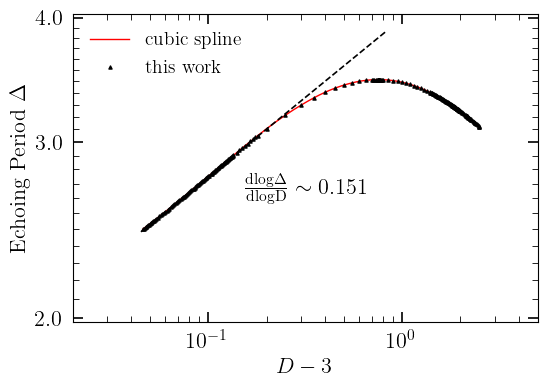

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator


import numpy as np
from scipy.interpolate import UnivariateSpline

def weighted_spline_samples(keys, values, errors, n_samples=300, k=3, s=None):
    """
    keys   : x-values (list/array)
    values : y-values (list/array)
    errors : 1σ y-errors (list/array), used as weights (smaller error => higher weight)
    n_samples: number of equally spaced x-samples to return
    k      : spline degree (3=cubic)
    s      : smoothing factor. If None, use ~N (good starting point when errors are 1σ).
             Use s=0 for (near-)interpolating behavior (can overfit noisy data).
    Returns: xx (equidistant), yy (spline evaluated), spline object
    """
    x = np.asarray(keys, dtype=float)
    y = np.asarray(values, dtype=float)
    sig = np.asarray(errors, dtype=float)

    # Basic cleaning
    m = np.isfinite(x) & np.isfinite(y) & np.isfinite(sig) & (sig > 0)
    x, y, sig = x[m], y[m], sig[m]
    if x.size < (k + 1):
        raise ValueError(f"Need at least {k+1} valid points for a degree-{k} spline; got {x.size}.")

    # Sort by x (required)
    idx = np.argsort(x)
    x, y, sig = x[idx], y[idx], sig[idx]

    # Handle duplicate x-values by averaging (weighted by 1/sigma^2)
    # (UnivariateSpline requires strictly increasing x)
    uniq_x, inv = np.unique(x, return_inverse=True)
    if uniq_x.size != x.size:
        w2 = 1.0 / (sig**2)
        y_acc = np.zeros_like(uniq_x, dtype=float)
        w_acc = np.zeros_like(uniq_x, dtype=float)
        sig_acc = np.zeros_like(uniq_x, dtype=float)

        for i, j in enumerate(inv):
            y_acc[j] += y[i] * w2[i]
            w_acc[j] += w2[i]

        y_new = y_acc / w_acc
        # Combine errors at duplicates (for weighting): sigma_eff = 1/sqrt(sum(1/sigma^2))
        sig_new = 1.0 / np.sqrt(w_acc)

        x, y, sig = uniq_x, y_new, sig_new

    # Weights for UnivariateSpline: w = 1/sigma  (NOT 1/sigma^2)
    w = 1.0 / sig

    if s is None:
        s = len(x)  # good default when errors are meaningful 1σ

    spl = UnivariateSpline(x, y, w=w, s=s, k=k)

    # 300 equidistant samples over the x-range
    xx = np.linspace(x.min(), x.max(), n_samples)
    yy = spl(xx)
    return xx, yy, spl
                

# ---------------- LaTeX + font ----------------
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 16
})

# ---------------- Load data ----------------
logdelta = np.loadtxt("deltalargeD.dat")
deltadat = np.loadtxt("DeltaList.dat")

# Load the two papers that have largeD data together with errors
blandthesis=np.loadtxt("DeltaBlandThesis.dat")[0]

#---------INTERPOLATION------------------
# concatenate all the data
xdata = np.concatenate([deltadat[:,0]-3])
ydata = np.concatenate([deltadat[:,1]]) 
err = np.concatenate([[0.0001]*len(xdata)])

# we are interested in an upper bound for the tangent inclination at the smalles 1/D
# therefore, take as y data for the interpolation always the lowest consistent values in the given error bound
# the errors are then set small but we plot them later in terms of correct error bars
#ydata = ydata-2*err
#errmod = [0.00001]*len(ydata)

xx, yy, spl = weighted_spline_samples(xdata, ydata, err, n_samples=300, s=None)

# ---------------- Figure ----------------
fig, ax = plt.subplots(
    facecolor='white',
    dpi=100,
    figsize=(6, 4)
)

# ---------------- Log–log axes ----------------
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(0.02, 5)
ax.set_ylim(1.98, 4.03)

xtickstotal = np.linspace(0.05,0.35,23).tolist()
ytickstotal = np.linspace(2,4,23).tolist()

#ax.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6], minor=False)
#ax.set_xticks([x for x in xtickstotal if x not in [0.1,0.2,0.3]], minor=True)
#ax.set_xticklabels([r'$1\times 10^{-1}$',r'$2\times 10^{-1}$',r'$3\times 10^{-1}$'])

ax.set_yticks([2,3,4], minor=False)
ax.set_yticks([y for y in ytickstotal if y not in [2,3,4]], minor=True)
ax.set_yticklabels([r'$2.0$',r'$3.0$',r'$4.0$'])


# ---------------- Tick styling (standard log ticks) ----------------
ax.tick_params(which='major', direction='in', top=True, right=True, length=7, width=1.2)
ax.tick_params(which='minor', direction='in', top=True, right=True, length=4)
ax.tick_params(which="minor", labelbottom=False, labelleft=False)
ax.tick_params(which="major",pad=7)

# ---------------- Labels ----------------
ax.set_xlabel(r'$D-3$')
ax.set_ylabel(r'${\rm Echoing~Period}~\Delta$')

# ---------------- Plot ----------------
ax.plot(
    xx,
    yy,
    color="red",
    linestyle="-",
    linewidth=1,
    label=r'$\rm cubic~spline $'
)

ax.plot(
    [0.045,0.82],
    [2.44,3.87],
    color="black",
    linestyle="--",
    linewidth=1.2
)
ax.annotate(
    r"$\frac{\rm{d}log\Delta }{\rm{d}log D}\sim 0.151$",
    xy=(0.15, 2.2),        # data coordinates
    xytext=(0.155, 2.6),
    textcoords="data",
    ha="left",
    va="bottom",
    fontsize=16
)

plt.scatter(deltadat[:,0]-3,deltadat[:,1],s=5, marker='^', color="black",zorder=10, label=r'$\rm{this~work}$')


# eror bars in literature
#plt.errorbar(1/SO[:,0],SO[:,1], yerr=SO[:,2], fmt='o',markersize=3, capsize=6,zorder=2,linewidth=1, label=r"$\rm Sorkin/Oren$")
#plt.errorbar(1/bland2[:,0],bland2[:,1], yerr=bland2[:,2], fmt='o',markersize=3, capsize=6,zorder=2,linewidth=1, label=r"$\rm{Bland~et~al.}$")
#plt.errorbar(bland3[0],bland3[1], yerr=bland3[2], fmt='o',markersize=3, capsize=6,zorder=2,linewidth=1, label=r"$\rm Ref.[3]$")
#plt.errorbar(AG[0],AG[1], yerr=AG[2], fmt='o',markersize=3, capsize=6,zorder=2,linewidth=1, label=r"$\rm Ref.[4]$")
#plt.errorbar(blandthesis[0]-3,blandthesis[1], yerr=blandthesis[2], fmt='o',markersize=3, capsize=6,zorder=2,linewidth=1, label=r"$\rm Bland~thesis$")

plt.legend(loc="upper left",fontsize=14,frameon=False)

# ---------------- Save ----------------
plt.savefig("logdeltasmallDnoBland.pdf", dpi=200, bbox_inches='tight')



# Single 3D plot of a field variable

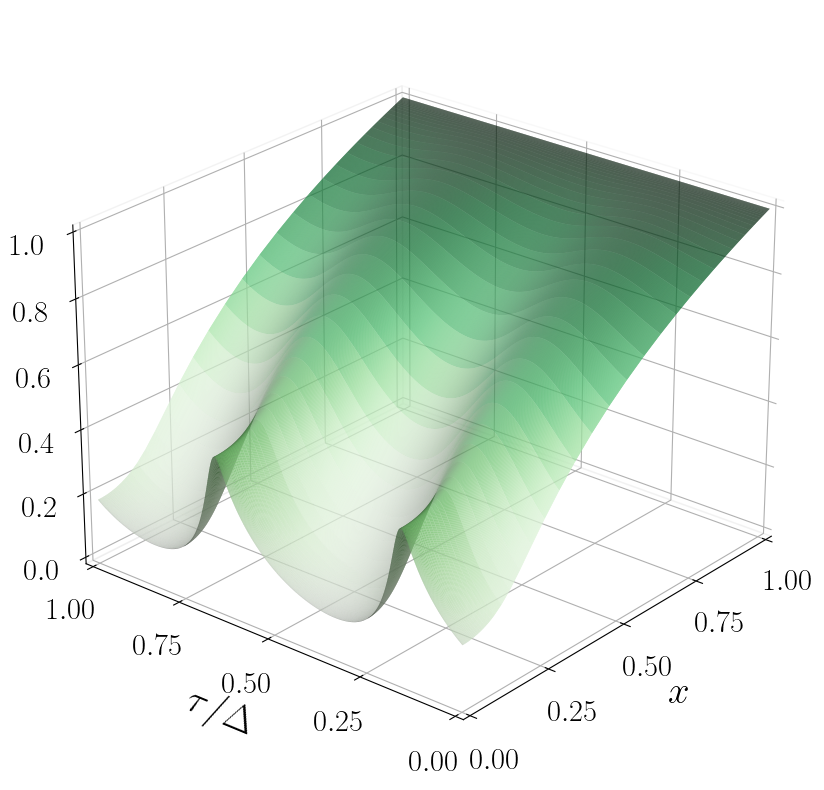

In [9]:
import json
from matplotlib.colors import LightSource

# result file name
file = "fields_4.000000_3.json"

# spacetime dimension
dim=4

# dictonary containing data
data = {}

with open(file, "r") as f:
    data = json.load(f)

# loading x-values
data["x"] = np.array(sorted(list(data.keys()))[:-1])

# loading tau-values
data["tau"] = np.linspace(0,data["Delta"],num=len(data[str(data["x"][0])]["A"]),)

# assambling field data for all x
As, Us, Vs, fs = [], [], [], []
for x in data["x"]:
    x_str = str(x)
    As.append(data[x_str]["A"])
    Us.append(data[x_str]["U"])
    Vs.append(data[x_str]["V"])
    fs.append(data[x_str]["f"])
    del data[x_str]
data["a"] = np.array(As).T
data["f"] = np.array(fs).T
data["U"] = np.array(Us).T
data["V"] = np.array(Vs).T

# x-tau mesh 
data["x"], data["tau"] = np.meshgrid(np.array(data["x"], dtype=np.float64),data["tau"],)

# preparing fields for plotting
ia2 = 1 / data["a"]**(2)
U = data["U"]
V = data["V"]
x = data["x"]
t = data["tau"]
delta = data["Delta"]
data["omega"] = -np.log(ia2)
data["pi"] = (V+U) / (2*x) * np.sqrt((float(dim) - 2)**3 / 4)
data["psi"] = (V-U) / (2*x**2) * np.sqrt((float(dim) - 2)**3 / 4)

# figure
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12, 10),subplot_kw={"projection": "3d"},)

# plot range
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)

# labels
ax.zaxis.set_rotate_label(False)
ax.set_xlabel(r"$x$", fontsize=28, labelpad=20)
ax.set_ylabel(r"$\tau / \Delta$", fontsize=28, labelpad=20)
ax.set_zlabel(r"$f(x,\tau)$", fontsize=28, labelpad=20, rotation=90)

# tics
ax.tick_params(axis="x", pad=10, labelsize=22)
ax.tick_params(axis="y", pad=10, labelsize=22)
ax.tick_params(axis="z", pad=10, labelsize=22, width=1.5, length=6)

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.25))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.25))
ax.zaxis.set_major_locator(mpl.ticker.MaxNLocator(5))

# view
ax.view_init(elev=25, azim=-140)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# color maps
cmaps = [mpl.cm.Blues, mpl.cm.Greens, mpl.cm.Reds, mpl.cm.Purples]
cmap=cmaps[1]

res = data["f"]

# lighting and shading
ls = LightSource(azdeg=315, altdeg=45)
rgb = ls.shade(res, cmap=cmap, vert_exag=0.1, blend_mode="soft")

# surface plot
ax.plot_surface(x,t/delta,res,facecolors=rgb,rstride=1,cstride=1,linewidth=0,antialiased=True,rasterized=True,)


# 3D plot of field variables in various D

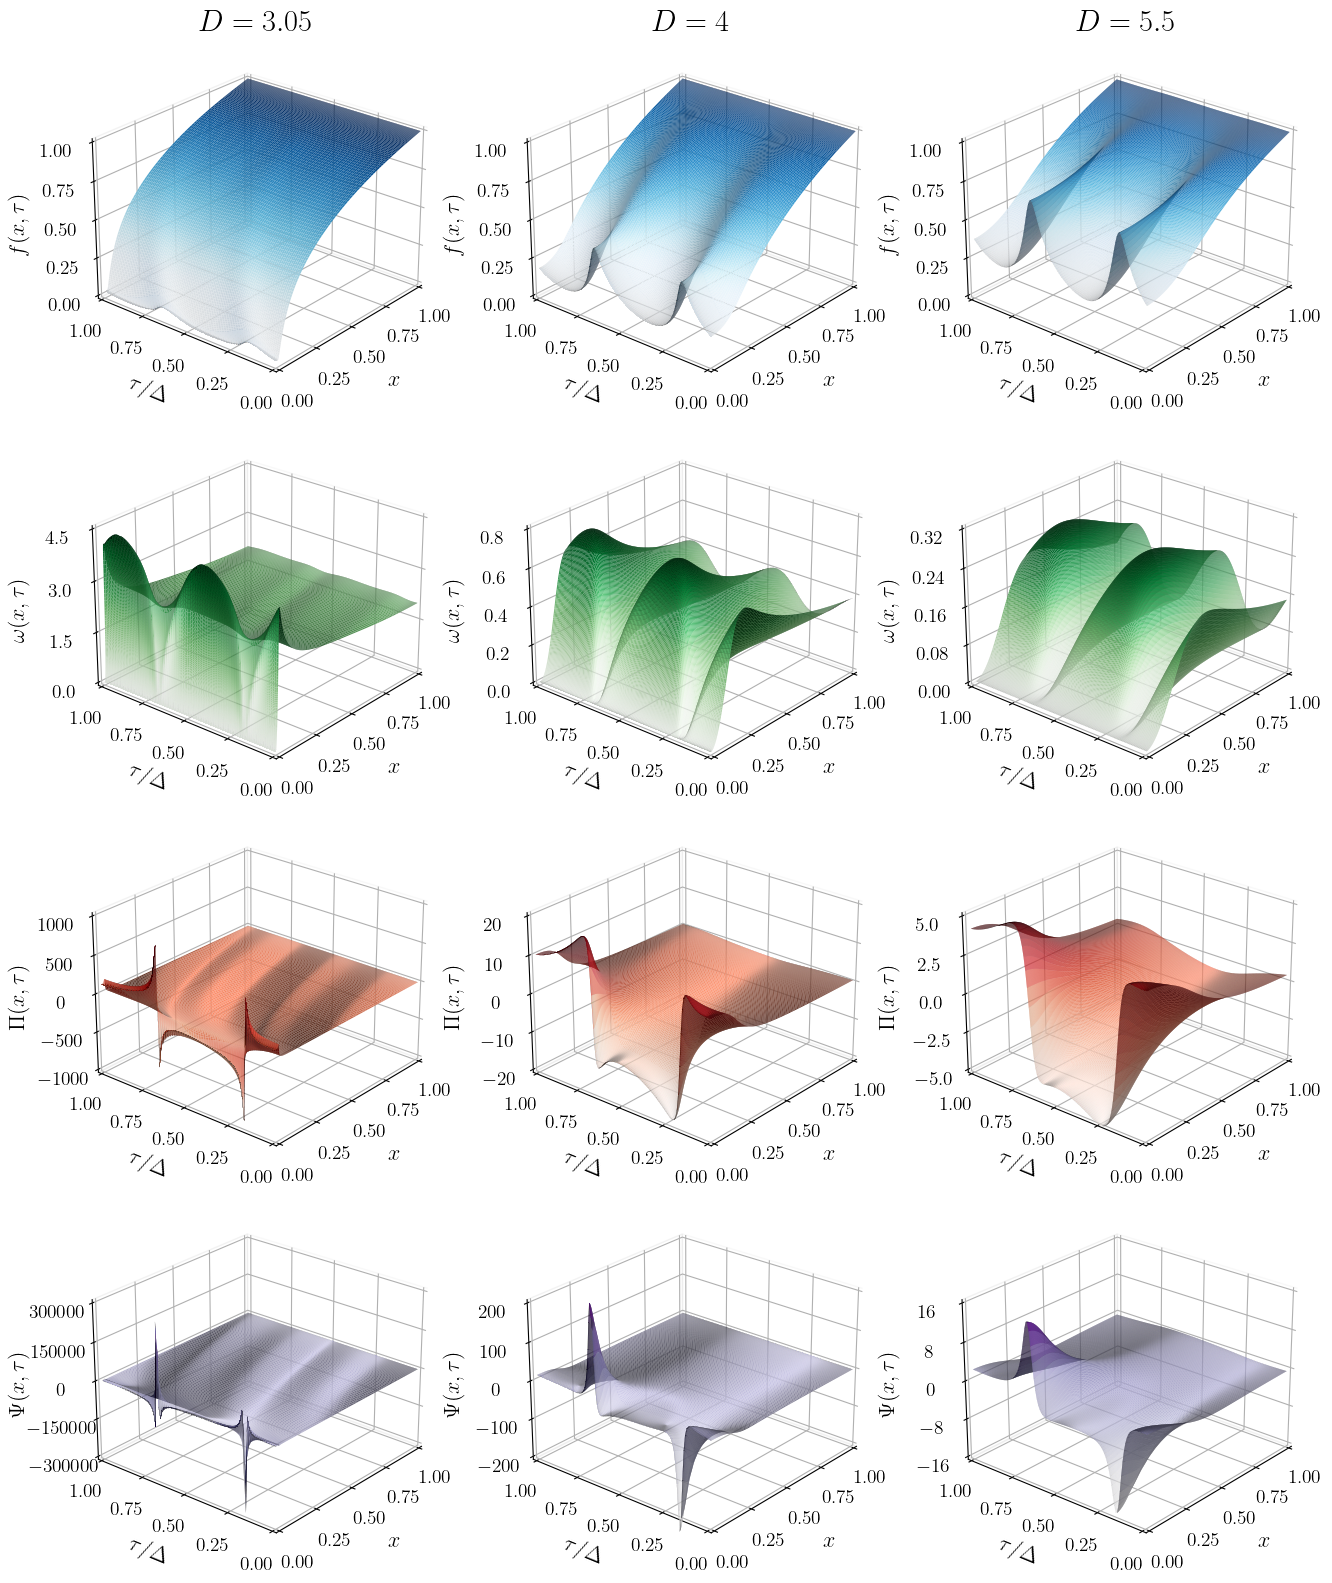

In [7]:
import json
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource
from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as mticker

# LaTeX font
plt.rcParams.update({
    "text.usetex": True,
    'font.size': 16
    })

# --------------------------------------------------
# Helper: load one dataset and build all 4 fields
# --------------------------------------------------
def load_dataset(fname, dim):
    with open(fname, "r") as f:
        data = json.load(f)

    # identify x-keys (strings) and x-values (floats)
    x_keys = sorted([k for k in data.keys() if k != "Delta"], key=float)
    x_vals = np.array([float(k) for k in x_keys])

    data["x"] = x_vals

    # tau-values: use the first x-key directly (string)
    n_tau = len(data[x_keys[0]]["A"])
    data["tau"] = np.linspace(0, data["Delta"], num=n_tau)

    # assemble field data
    As, Us, Vs, fs = [], [], [], []
    for x_key in x_keys:
        As.append(data[x_key]["A"])
        Us.append(data[x_key]["U"])
        Vs.append(data[x_key]["V"])
        fs.append(data[x_key]["f"])

    data["a"] = np.array(As).T
    data["f"] = np.array(fs).T
    data["U"] = np.array(Us).T
    data["V"] = np.array(Vs).T

    # mesh
    x, t = np.meshgrid(data["x"], data["tau"])
    delta = data["Delta"]

    # derived fields
    ia2 = 1.0 / data["a"]**2
    U = data["U"]
    V = data["V"]
    pref = np.sqrt((float(dim) - 2)**3 / 4)

    omega = -np.log(ia2)
    pi    = (V + U) / (2 * x)    * pref
    psi   = (V - U) / (2 * x**2) * pref
    f     = data["f"]

    return x, t, delta, f, omega, pi, psi

# --------------------------------------------------
# Files and column titles
# --------------------------------------------------
files = [
    "fields_3.046000_0.json",  # column 1
    "fields_4.000000_0.json",  # column 2
    "fields_5.500000_0.json",  # column 3
]

column_titles = [
    r"$D=3.05$",
    r"$D=4$",
    r"$D=5.5$",
]

dims=[3.045,4,5.5]

# --------------------------------------------------
# 4×3 plot with extra empty column on the left
# --------------------------------------------------
fig, axes = plt.subplots(
    nrows=4,
    ncols=4,            # <-- 4 columns now
    figsize=(14,16),
    subplot_kw={"projection": "3d"},
    gridspec_kw={"width_ratios":[0.1, 1, 1, 1]}
)

cmaps = [mpl.cm.Blues, mpl.cm.Greens, mpl.cm.Reds, mpl.cm.Purples]
ls = LightSource(azdeg=315, altdeg=45)

for j, fname in enumerate(files):  # one dataset per visible column
    x, t, delta, f, omega, pi, psi = load_dataset(fname, dims[j])

    fields = [
        (f,     r"$f(x,\tau)$"),
        (omega, r"$\omega(x,\tau)$"),
        (pi,    r"$\Pi(x,\tau)$"),
        (psi,   r"$\Psi(x,\tau)$"),
    ]

    # note: plot into axes[i, j+1]
    # because col 0 stays empty
    for i, (field, zlabel) in enumerate(fields):
        ax = axes[i, j+1]

        rgb = ls.shade(field, cmap=cmaps[i], vert_exag=0.1, blend_mode="soft")
        ax.plot_surface(
            x,
            t / delta,
            field,
            facecolors=rgb,
            rstride=1,
            cstride=1,
            linewidth=0,
            antialiased=True,
            rasterized=True,
        )

        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)

        ax.set_xlabel(r"$x$", fontsize=16, labelpad=10)
        ax.set_ylabel(r"$\tau/\Delta$", fontsize=16, labelpad=10)

        # z-axis label (NO clipping now)
        ax.zaxis.set_rotate_label(False)
        ax.set_zlabel(zlabel, fontsize=16, rotation=90, labelpad=10)

        if i == 0:
            ax.set_title(column_titles[j], fontsize=22, pad=5)

        ax.tick_params(axis="x", pad=5, labelsize=14)
        ax.tick_params(axis="y", pad=5, labelsize=14)
        ax.tick_params(axis="z", pad=6, labelsize=14, width=1, length=4)

        ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.25))
        ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.25))
        ax.zaxis.set_major_locator(mpl.ticker.MaxNLocator(4))

        ax.view_init(elev=25, azim=-140)
        ax.xaxis.pane.fill = False
        ax.yaxis.pane.fill = False
        ax.zaxis.pane.fill = False

# adjusting z-ranges
for i in range(4):
    axes[0, i].set_zlim(0, 1)

axes[1, 1].set_zlim(0, 4.5)
axes[1, 2].set_zlim(0, 0.8)
axes[1, 3].set_zlim(0, 0.32)

axes[2, 1].set_zlim(-1000, 1000)
axes[2, 2].set_zlim(-20, 20)
axes[2, 3].set_zlim(-5, 5)

axes[3, 1].set_zlim(-300000, 300000)
axes[3, 2].set_zlim(-200, 200)
axes[3, 3].set_zlim(-16, 16)

# --------------------------------------------------
# Hide leftmost empty column
# --------------------------------------------------
for i in range(4):
    axes[i,0].axis("off")


plt.subplots_adjust(left=0.03, right=0.98, wspace=0.1, hspace=0.15)
plt.tight_layout()
plt.savefig("fieldsD.pdf", dpi=100, bbox_inches="tight")
plt.show()

# Converged boundary conditions

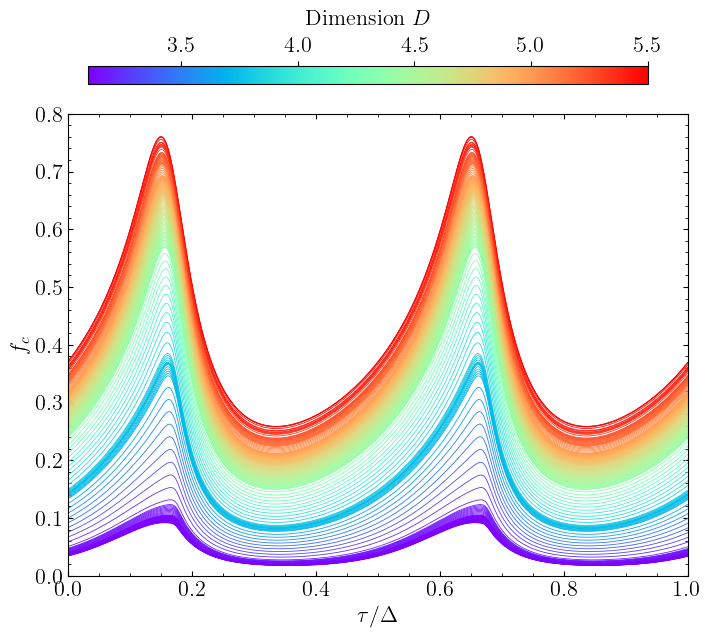

In [11]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# LaTeX font
plt.rcParams.update({
    "text.usetex": True,
    'font.size': 16
})

# ---------------- Load Data ----------------
with open("boundaryData.json", "r") as f:
    data = json.load(f)

Delta = np.array(data["Delta"])
fc    = np.array(data["fc"])

# ---------------- Color Parameter ----------------
vals = Delta[:, 0]
vmin, vmax = vals.min(), vals.max()
norm_vals = (vals - vmin) / (vmax - vmin)
cmap = cm.get_cmap("rainbow")

# ---------------- Main Plot ----------------
fig, ax = plt.subplots(figsize=(8, 6))

for i in range(fc.shape[0]):
    x = fc[i,:,0]
    y = fc[i,:,1]
    x_norm = (x - x.min()) / (x.max() - x.min())
    ax.plot(x_norm, y, color=cmap(norm_vals[i]), linewidth=0.6)

# Axis labels and limits
ax.set_xlabel(r"$\tau/\Delta$")
ax.set_ylabel(r"$f_c$")
ax.set_xlim(0, 1)
ax.set_ylim(0, 0.8)

# Ticks
ax.tick_params(direction="in", which="both", top=True, right=True)
ax.minorticks_on()

# ---------------- Colorbar ABOVE ----------------
sm = cm.ScalarMappable(cmap=cmap)
sm.set_array(vals)

# Create a dedicated axis above the plot
cbar_ax = fig.add_axes([0.15, 0.93, 0.7, 0.03])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')

# --- Put ticks and numeric labels on TOP ---
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# --- Label above bar ---
cbar.set_label(r"${\rm Dimension}~D$", labelpad=8)

# Optional: remove bottom ticks to look cleaner
cbar.ax.tick_params(bottom=False)

plt.subplots_adjust(top=0.88)


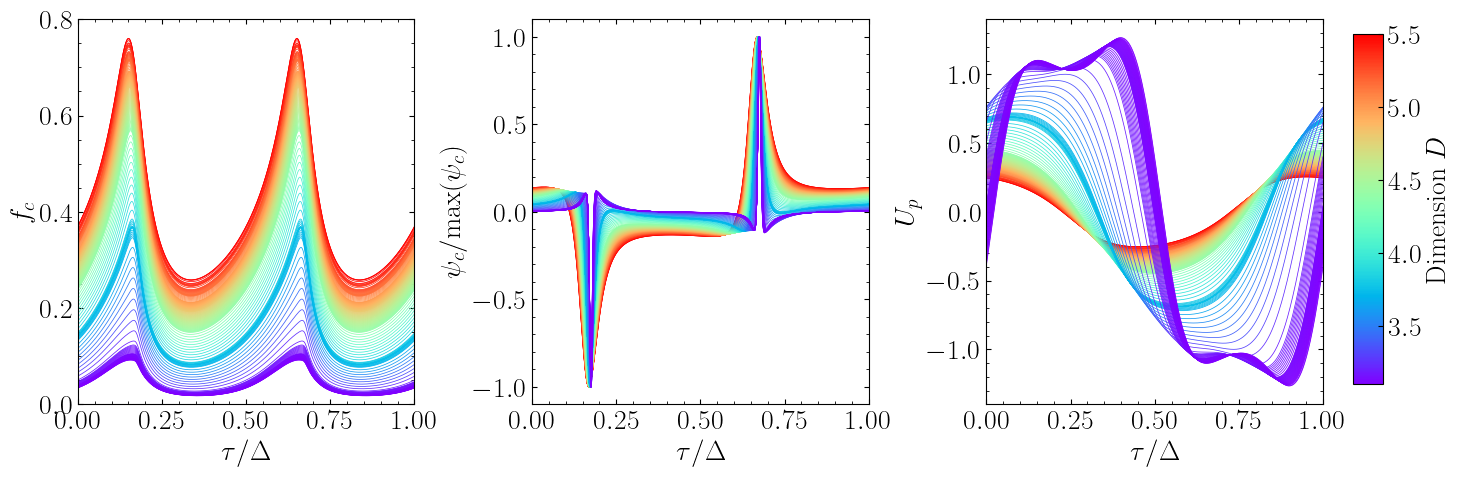

In [12]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# ---------------- LaTeX Font ----------------
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 20
})

# ---------------- Load Data ----------------
with open("boundaryData.json", "r") as f:
    data = json.load(f)

Delta = np.array(data["Delta"])
fc    = np.array(data["fc"])
psic  = np.array(data["psic"])
Up    = np.array(data["Up"])

# ---------------- Color Parameter ----------------
vals = Delta[:, 0]
vmin, vmax = vals.min(), vals.max()
norm_vals = (vals - vmin) / (vmax - vmin)
cmap = cm.get_cmap("rainbow")

# =================================================
#  Helper: Curve Plotter
# =================================================
def plot_family(ax, arr, ylabel):
    """
    arr[i,:,0] = x
    arr[i,:,1] = y
    """
    for i in range(arr.shape[0]):
        x = arr[i,:,0]
        y = arr[i,:,1]
        x_norm = (x - x.min()) / (x.max() - x.min())
        y_norm=y/y.max()
        if ax==axes[1]:
            y=y_norm
        ax.plot(x_norm, y, color=cmap(norm_vals[i]), linewidth=0.55)

    ax.set_xlim(0, 1)
    #ax.set_ylim(0, 1.1)
    ax.set_xlabel(r"$\tau/\Delta$")
    ax.set_ylabel(ylabel)

    # ticks in all directions
    ax.tick_params(direction="in", which="both", top=True, right=True)
    ax.minorticks_on()


# =================================================
#  Main Figure
# =================================================
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)

axes[0].set_ylim(0, 0.8)
axes[2].set_ylim(-1.4, 1.4)

plot_family(axes[0], fc,   r"$f_c$")
plot_family(axes[1], psic, r"$\psi_c/{\rm max}(\psi_c)$")
plot_family(axes[2], Up,   r"$U_p$")


# =================================================
#  Dedicated Colorbar Axis (outside)
# =================================================
sm = cm.ScalarMappable(cmap=cmap)
sm.set_array(vals)

# Create a vertical bar to the right of last axis
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.70])  # left, bottom, width, height
cbar = fig.colorbar(sm, cax=cbar_ax, orientation="vertical")

cbar.set_label(r"${\rm Dimension}~D$")
cbar.ax.tick_params(direction="in")


plt.subplots_adjust(left=0.07, right=0.90, wspace=0.35)
plt.savefig("boundaryConditions.pdf", dpi=100, bbox_inches="tight")
plt.show()


# Boundary Data plots

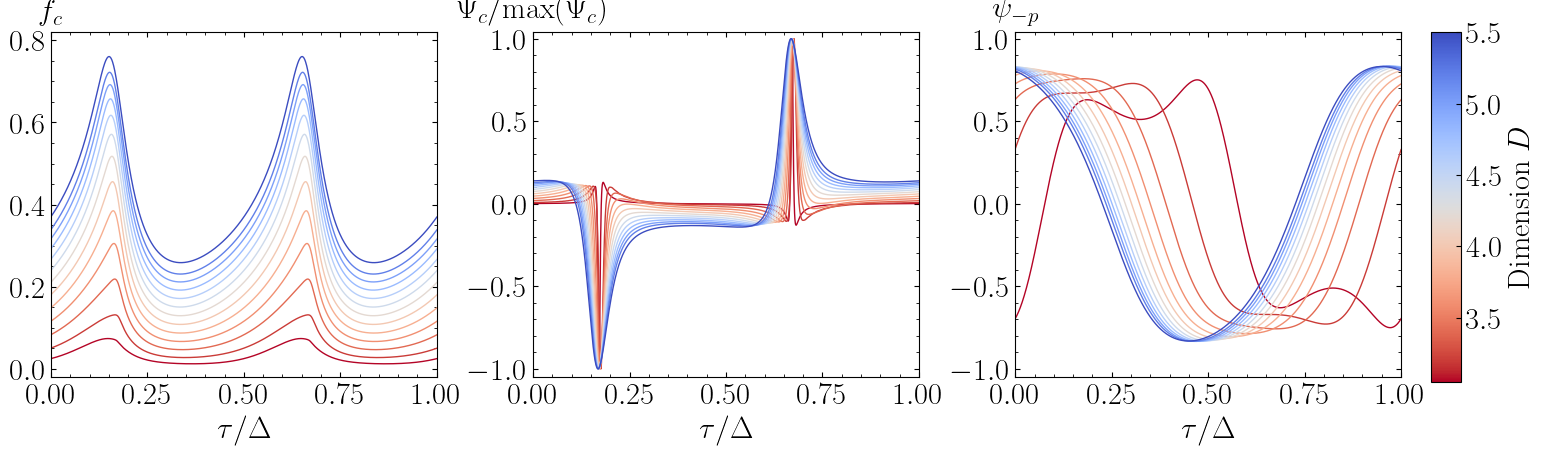

In [19]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# ---------------- LaTeX Font ----------------
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 22
})

# ---------------- Load Data ----------------
with open("../complete_data/critcoll_data.json", "r") as f:
    data = json.load(f)

dims = ["3.05", "3.2", "3.4", "3.6", "3.8", "4.0", "4.2", "4.4", "4.6", "4.8", "5.0", "5.199", "5.5"]
vals = np.array(dims,dtype=float)

Delta = [data[dim]["Initial_Conditions"]["Delta"] for dim in dims]

fc = []
psic = []
psimp = []

for dim in dims:
    tauvals = np.linspace(0.,1.,data[dim]["Ntau"],endpoint=False)
    fcnow = np.array(list(zip(tauvals,data[dim]["Initial_Conditions"]["fc"])))
    fact = np.sqrt((float(dim)-2)**3 / 4)
    psimpvals = list(fact * np.array(data[dim]["Initial_Conditions"]["Up"]))
    psicnow = np.array(list(zip(tauvals,data[dim]["Initial_Conditions"]["psic"])))
    psimpnow = np.array(list(zip(tauvals,psimpvals)))
    fc.append(fcnow)
    psic.append(psicnow)
    psimp.append(psimpnow)

# ---------------- Color Parameter ----------------
vmin, vmax = vals.min(), vals.max()
norm_vals = (vals - vmin) / (vmax - vmin)
cmap = cm.get_cmap("coolwarm_r")

# =================================================
#  Helper: Curve Plotter
# =================================================
def plot_family(ax, arr, ylabel):
    """
    arr[i,:,0] = x
    arr[i,:,1] = y
    """
    for i in range(len(arr)):
        x = arr[i][:,0]
        y = arr[i][:,1]
        x_norm = (x - x.min()) / (x.max() - x.min())
        y_norm=y/y.max()
        if ax==axes[1]:
            y=y_norm
        ax.plot(x_norm, y, color=cmap(norm_vals[i]), linewidth=1)

    ax.set_xlim(0, 1)
    #ax.set_ylim(0, 1.1)
    ax.set_xlabel(r"$\tau/\Delta$")
    ax.set_ylabel(ylabel)

    # ticks in all directions
    ax.tick_params(direction="in", which="both", top=True, right=True)
    ax.minorticks_on()


# =================================================
#  Main Figure
# =================================================
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)

axes[0].set_ylim(-0.02, 0.82)
axes[1].set_ylim(-1.05, 1.04)
axes[2].set_ylim(-1.05, 1.04)

plot_family(axes[0], fc,   r"$f_c$")
plot_family(axes[1], psic, r"$\Psi_c/{\rm max}(\Psi_c)$")
plot_family(axes[2], psimp,   r"$\psi_{-p}$")

axes[0].set_ylabel(r"$f_c$", rotation=0, labelpad=40)
axes[0].yaxis.set_label_coords(0, 1.02)

axes[1].set_ylabel(r"$\Psi_c/{\rm max}(\Psi_c)$", rotation=0, labelpad=40)
axes[1].yaxis.set_label_coords(0, 1.02)

axes[2].set_ylabel(r"$\psi_{-p}$", rotation=0, labelpad=40)
axes[2].yaxis.set_label_coords(0, 1.02)

# =================================================
#  Dedicated Colorbar Axis (outside)
# =================================================
sm = cm.ScalarMappable(cmap=cmap)
sm.set_array(vals)

# Create a vertical bar to the right of last axis
cbar_ax = fig.add_axes([0.92, 0.1, 0.02, 0.70])  # left, bottom, width, height
cbar = fig.colorbar(sm, cax=cbar_ax, orientation="vertical")

cbar.set_label(r"${\rm Dimension}~D$")
cbar.ax.tick_params(direction="in")


plt.subplots_adjust(left=0, right=0.90, wspace=0.25, top=0.8)
plt.savefig("boundaryConditions.pdf", dpi=100, bbox_inches="tight")
plt.show()


# NEC plot

[3.05  3.2   3.4   3.6   3.8   4.    4.2   4.4   4.6   4.8   5.    5.199
 5.5  ]


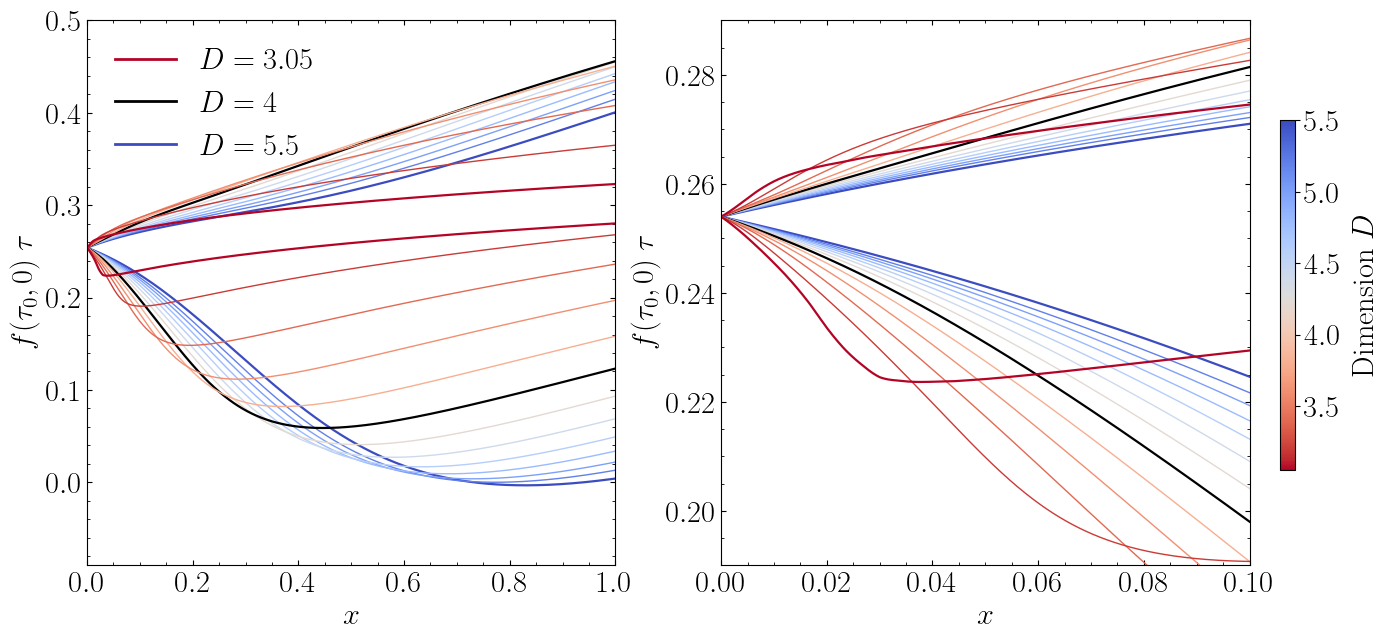

In [20]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.lines import Line2D

# LaTeX font
plt.rcParams.update({
    "text.usetex": True,
    'font.size': 22
})

# ----------- PLOT ------------------
fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=False)

# --------------- LEFT PLOT -----------------
# ---------------- Load Data ----------------
with open("NECfull.json", "r") as f:
    data = json.load(f)

vals = np.array(data["dims"])
unec = np.array(data["UNEC"])
vnec = np.array(data["VNEC"])

# ---------------- Color Parameter ----------------
vmin, vmax = vals.min(), vals.max()
norm_vals = (vals - vmin) / (vmax - vmin)
cmap = cm.get_cmap("coolwarm_r")

print(vals)

for i in reversed(range(unec.shape[0])):
    x = unec[i,:,0]
    y = unec[i,:,1]
    if i in [0, (unec.shape[0]-1)]:
        ax[0].plot(x, y, color=cmap(norm_vals[i]), linewidth=1.6)
    elif i==5:
        ax[0].plot(x, y, color='k', linewidth=1.6)
    else:
        ax[0].plot(x, y, color=cmap(norm_vals[i]), linewidth=1.0)

for i in reversed(range(vnec.shape[0])):
    x = vnec[i,:,0]
    y = vnec[i,:,1]
    if i in [0, (vnec.shape[0]-1)]:
        ax[0].plot(x, y, color=cmap(norm_vals[i]), linewidth=1.6)
    elif i==5:
        ax[0].plot(x, y, color='k', linewidth=1.6)
    else:
        ax[0].plot(x, y, color=cmap(norm_vals[i]), linewidth=1.0)

# Axis labels and limits
ax[0].set_xlabel(r"$x$")
ax[0].set_ylabel(r"$f(\tau _0,0)\;\tau $")
ax[0].set_xlim(0, 1)
ax[0].set_ylim(-0.09, 0.5)

# Ticks
ax[0].tick_params(direction="in", which="both", top=True, right=True)
ax[0].minorticks_on()

# Custom legend entries
handles = [
    Line2D([], [], color=cmap(0.0), lw=2, label=r"$D=3.05$"),
    Line2D([], [], color='k', lw=2, label=r"$D = 4$"),
    Line2D([], [], color=cmap(1.0), lw=2, label=r"$D=5.5$"),
]

ax[0].legend(
    handles=handles,
    loc="upper left",
    frameon=False,
    framealpha=0.8,
    edgecolor="black"
)

#plt.subplots_adjust(top=0.88)

# ---------------- Right Plot ----------------
# ---------------- Load Data ----------------
with open("NECzoomed.json", "r") as f:
    data = json.load(f)

vals = np.array(data["dims"])
unec = np.array(data["UNEC"])
vnec = np.array(data["VNEC"])

for i in reversed(range(unec.shape[0])):
    x = unec[i,:,0]
    y = unec[i,:,1]
    if i in [0, (unec.shape[0]-1)]:
        ax[1].plot(x, y, color=cmap(norm_vals[i]), linewidth=1.6)
    elif i==5:
        ax[1].plot(x, y, color='k', linewidth=1.6)
    else:
        ax[1].plot(x, y, color=cmap(norm_vals[i]), linewidth=1.0)

for i in reversed(range(vnec.shape[0])):
    x = vnec[i,:,0]
    y = vnec[i,:,1]
    if i in [0, (vnec.shape[0]-1)]:
        ax[1].plot(x, y, color=cmap(norm_vals[i]), linewidth=1.6)
    elif i==5:
        ax[1].plot(x, y, color='k', linewidth=1.6)
    else:
        ax[1].plot(x, y, color=cmap(norm_vals[i]), linewidth=1.0)

# Axis labels and limits
ax[1].set_xlabel(r"$x$")
ax[1].set_ylabel(r"$f(\tau _0,0)\;\tau $")
ax[1].set_xlim(0, 0.1)
ax[1].set_ylim(0.19, 0.29)

# Ticks
ax[1].tick_params(direction="in", which="both", top=True, right=True)
ax[1].minorticks_on()

# ---------------- Colorbar ABOVE ----------------
sm = cm.ScalarMappable(cmap=cmap)
sm.set_array(vals)

# Create a vertical bar to the right of last axis
#cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.70])  # left, bottom, width, height
#cbar = fig.colorbar(sm, cax=cbar_ax, orientation="vertical")

#cbar.set_label(r"${\rm Dimension}~D$")
#cbar.ax.tick_params(direction="in")


# Create a dedicated axis above the plot
#cbar_ax = fig.add_axes([0.15, 0.93, 0.7, 0.03])
cbar_ax = fig.add_axes([0.92, 0.3, 0.01, 0.70])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='vertical')

# --- Put ticks and numeric labels on TOP ---
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# --- Label above bar ---
cbar.set_label(r"${\rm Dimension}~D$", labelpad=8)

# Optional: remove bottom ticks to look cleaner
cbar.ax.tick_params(bottom=False)


plt.subplots_adjust(top=1.2)
plt.savefig("NECoverD.pdf", dpi=100, bbox_inches="tight")
plt.show()

0.254


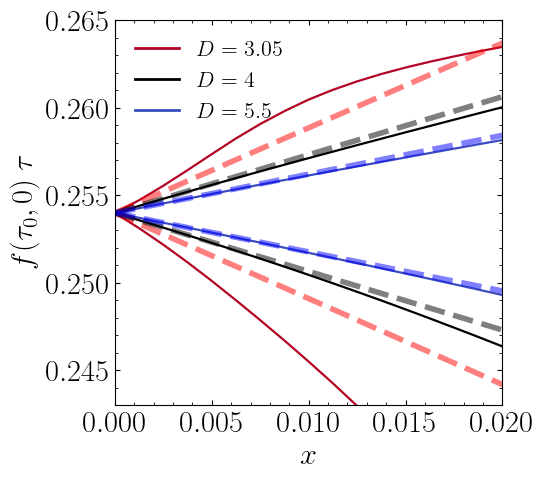

In [21]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1 import make_axes_locatable

# LaTeX font
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 22
})

# ----------- PLOT ------------------
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# ---------------- Load Data ----------------
with open("NECfull.json", "r") as f:
    data = json.load(f)

vals = np.array(data["dims"])
unec = np.array(data["UNEC"])
vnec = np.array(data["VNEC"])


tau0=unec[1,0,1]
print(tau0)
# NLO large D expansion of NEC lines
def tau(eps, x):
    return tau0 + eps * x - 0.5 * eps**2 * x**2


# ---------------- Color Parameter ----------------
vmin, vmax = vals.min(), vals.max()
norm_vals = (vals - vmin) / (vmax - vmin)
cmap = cm.get_cmap("coolwarm_r")

# ---------------- Plot Data ----------------
for i in reversed(range(unec.shape[0])):
    x = unec[i, :, 0]
    y = unec[i, :, 1]
    if i in [0, unec.shape[0] - 1]:
        ax.plot(x, y, color=cmap(norm_vals[i]), linewidth=1.6)
    elif i == 5:
        ax.plot(x, y, color='k', linewidth=1.6)
    

for i in reversed(range(vnec.shape[0])):
    x = vnec[i, :, 0]
    y = vnec[i, :, 1]
    if i in [0, vnec.shape[0] - 1]:
        ax.plot(x, y, color=cmap(norm_vals[i]), linewidth=1.6)
    elif i == 5:
        ax.plot(x, y, color='k', linewidth=1.6)

# adding large D curves
x = np.linspace(0, 1, 500)

# D=3.05
ax.plot(x, tau(1/(3.05-1), x), lw=4,ls="--",color="red",alpha=0.5)
ax.plot(x, tau(-1/(3.05-1), x), lw=4,ls="--",color="red",alpha=0.5)
# D=4
ax.plot(x, tau(1/(4-1), x), lw=4,ls="--",color="black",alpha=0.5)
ax.plot(x, tau(-1/(4-1), x), lw=4,ls="--",color="black",alpha=0.5)
# D=5.5
ax.plot(x, tau(1/(5.5-1), x), lw=4,ls="--",color="blue",alpha=0.5)
ax.plot(x, tau(-1/(5.5-1), x), lw=4,ls="--",color="blue",alpha=0.5)

# ---------------- Axes ----------------
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f(\tau _0,0)\;\tau$")
#1
ax.set_xlim(0, 0.02)
ax.set_ylim(0.243, 0.265)
#2
#ax.set_xlim(0, 0.005)
#ax.set_ylim(0.2515, 0.256)
#3
#ax.set_xlim(0, 0.0005)
#ax.set_ylim(0.25388, 0.2541)

ax.tick_params(direction="in", which="both", top=True, right=True)
ax.minorticks_on()

# ---------------- Legend ----------------
handles = [
    Line2D([], [], color=cmap(0.0), lw=2, label=r"$D=3.05$"),
    Line2D([], [], color='k', lw=2, label=r"$D = 4$"),
    Line2D([], [], color=cmap(1.0), lw=2, label=r"$D=5.5$"),
]

ax.legend(
    handles=handles,
    loc="upper left",
    frameon=False,
    fontsize=16
)

# ---------------- Colorbar ----------------
sm = cm.ScalarMappable(cmap=cmap)
sm.set_array(vals)

# ---------------- Save ----------------
plt.savefig("NECzoom1.pdf", dpi=100, bbox_inches="tight")
plt.show()


# fmax over D

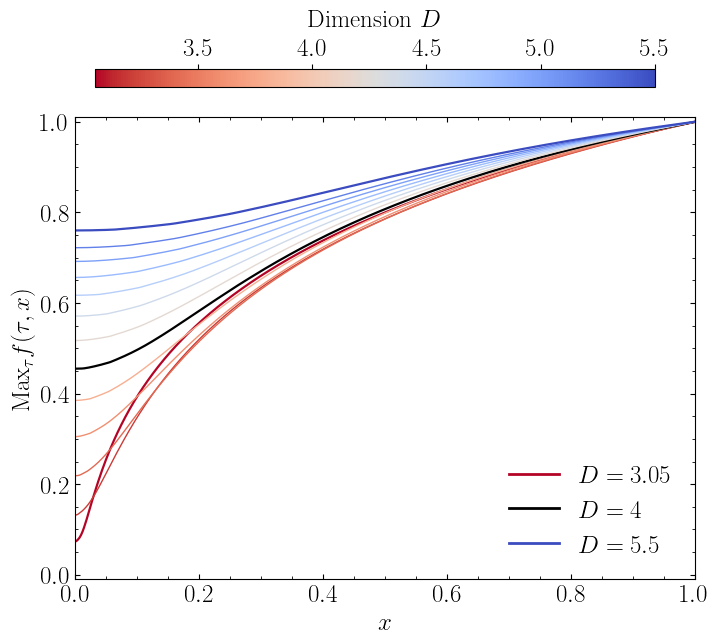

In [22]:
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.cm as cm

# LaTeX font
plt.rcParams.update({
    "text.usetex": True,
    'font.size': 18
})

# ---------------- Load Data ----------------
with open("fmax.json", "r") as f:
    data = json.load(f)

vals = np.array(data["dims"])
fmax = np.array(data["fmax"])

# ---------------- Color Parameter ----------------
vmin, vmax = vals.min(), vals.max()
norm_vals = (vals - vmin) / (vmax - vmin)
cmap = cm.get_cmap("coolwarm_r")

# ---------------- Main Plot ----------------
fig, ax = plt.subplots(figsize=(8, 6))

for i in range(fmax.shape[0]):
    x = fmax[i,:,0]
    y = fmax[i,:,1]
    #ax.plot(x, y, color=cmap(norm_vals[i]), linewidth=1)

    if i in [0, (fmax.shape[0]-1)]:
        ax.plot(x, y, color=cmap(norm_vals[i]), linewidth=1.6)
    elif i==5:
        ax.plot(x, y, color='k', linewidth=1.6)
    else:
        ax.plot(x, y, color=cmap(norm_vals[i]), linewidth=1.0)

# Axis labels and limits
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$\textrm{Max}_{\tau }f(\tau ,x)$")
ax.set_xlim(0, 1)
ax.set_ylim(-0.01, 1.01)

# Ticks
ax.tick_params(direction="in", which="both", top=True, right=True)
ax.minorticks_on()

# ---------------- Colorbar ABOVE ----------------
sm = cm.ScalarMappable(cmap=cmap)
sm.set_array(vals)

# Create a dedicated axis above the plot
cbar_ax = fig.add_axes([0.15, 0.93, 0.7, 0.03])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')

# --- Put ticks and numeric labels on TOP ---
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# Custom legend entries
handles = [
    Line2D([], [], color=cmap(0.0), lw=2, label=r"$D=3.05$"),
    Line2D([], [], color='k', lw=2, label=r"$D = 4$"),
    Line2D([], [], color=cmap(1.0), lw=2, label=r"$D=5.5$"),
]

ax.legend(
    handles=handles,
    loc="lower right",
    frameon=False,
    framealpha=0.8,
    edgecolor="black"
)

# --- Label above bar ---
cbar.set_label(r"${\rm Dimension}~D$", labelpad=8)

# Optional: remove bottom ticks to look cleaner
cbar.ax.tick_params(bottom=False)

plt.subplots_adjust(top=0.88)
plt.savefig("fmaxoverD.pdf", dpi=100, bbox_inches="tight")
plt.show()


# fmax lines tau over x

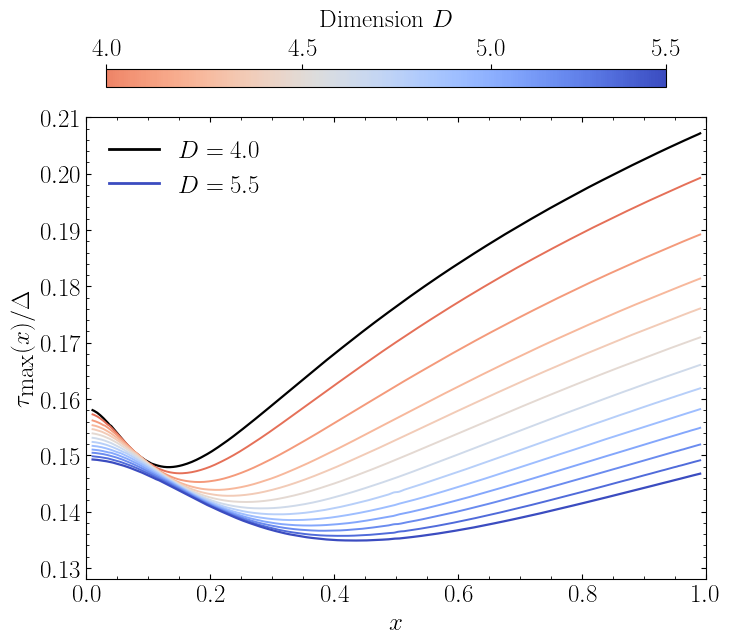

In [23]:
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# LaTeX font
plt.rcParams.update({
    "text.usetex": True,
    'font.size': 18
})

# ---------------- Load Data ----------------
with open("tofx.json", "r") as f:
    data = json.load(f)

vals = np.array(data["dims"])
fmax = np.array(data["tofx"])

# ---------------- Color Parameter ----------------
vmin, vmax = vals.min(), vals.max()
norm_vals = (9.0 / 10.0) * (vals - vmin ) / (vmax - vmin) + 0.1
cmap = cm.get_cmap("coolwarm_r")

# ---------------- Main Plot ----------------
fig, ax = plt.subplots(figsize=(8, 6))

for i in range(fmax.shape[0]):
    x = fmax[i,:,0]
    y = fmax[i,:,1]
    #ax.plot(x, y, color=cmap(norm_vals[i]), linewidth=1)

    if i == 0:
        ax.plot(x, y, color='k', linewidth=1.6)
    elif i == (fmax.shape[0]-1):
        ax.plot(x, y, color=cmap(norm_vals[i]), linewidth=1.6)
    else:
        ax.plot(x, y, color=cmap(norm_vals[i]), linewidth=1.4)

# Axis labels and limits
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$\tau _{\textrm{max}}(x)/\Delta $")
ax.set_xlim(0, 1)
ax.set_ylim(0.128, 0.21)

# Ticks
ax.tick_params(direction="in", which="both", top=True, right=True)
ax.minorticks_on()

# ---------------- Colorbar ABOVE ----------------
start = 0.2          
end   = 1.0
# Truncate the colormap so 0 -> original cmap(start), 1 -> original cmap(end)
cmap_trunc = mcolors.LinearSegmentedColormap.from_list(
    f"trunc_{cmap.name}",
    cmap(np.linspace(start, end, 256))
)

# Normalize your values to [start, end] (so value=start maps to 0 in the truncated cmap)
norm = mcolors.Normalize(vmin=start, vmax=end)

sm = cm.ScalarMappable(norm=norm, cmap=cmap_trunc)

#sm = cm.ScalarMappable(cmap=cmap)
sm.set_array(vals)

# Create a dedicated axis above the plot
cbar_ax = fig.add_axes([0.15, 0.93, 0.7, 0.03])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')

# --- Put ticks and numeric labels on TOP ---
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')
cbar.set_ticks([start, 0.48, 0.75, 1.0])
cbar.set_ticklabels([r"$4.0$", r"$4.5$", r"$5.0$", r"$5.5$"])

#------ LEGEND -------
# Custom legend entries
handles = [
    Line2D([], [], color='k', lw=2, label=r"$D=4.0$"),
    Line2D([], [], color=cmap(1.0), lw=2, label=r"$D=5.5$"),
]

ax.legend(
    handles=handles,
    loc="upper left",
    frameon=False,
    framealpha=0.8,
    edgecolor="black"
)

# --- Label above bar ---
cbar.set_label(r"${\rm Dimension}~D$", labelpad=8)

# Optional: remove bottom ticks to look cleaner
cbar.ax.tick_params(bottom=False)

plt.subplots_adjust(top=0.88)
plt.savefig("tauofx.pdf", dpi=100, bbox_inches="tight")
plt.show()


# L2(omega) over x

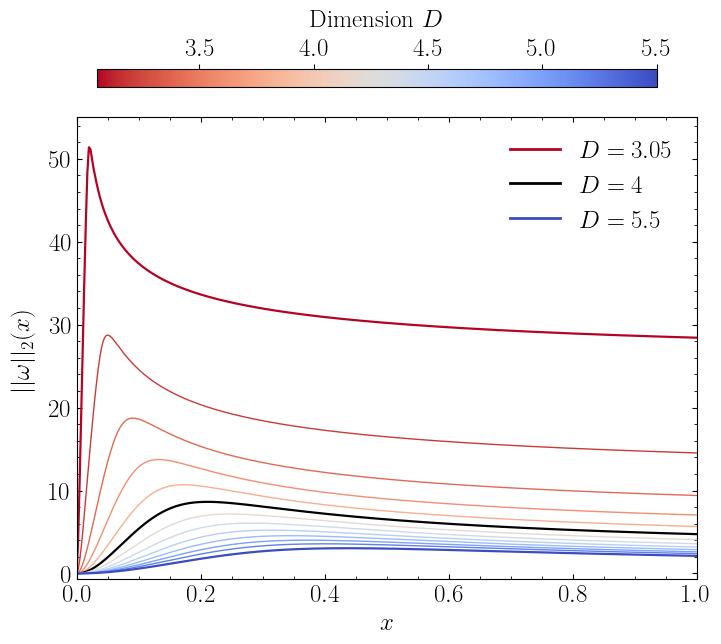

In [24]:
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.cm as cm

# LaTeX font
plt.rcParams.update({
    "text.usetex": True,
    'font.size': 18
})

# ---------------- Load Data ----------------
with open("omL2.json", "r") as f:
    data = json.load(f)

vals = np.array(data["dims"])
fmax = np.array(data["omL2"])

# ---------------- Color Parameter ----------------
vmin, vmax = vals.min(), vals.max()
norm_vals = (vals - vmin) / (vmax - vmin)
cmap = cm.get_cmap("coolwarm_r")

# ---------------- Main Plot ----------------
fig, ax = plt.subplots(figsize=(8, 6))

for i in range(fmax.shape[0]):
    x = fmax[i,:,0]
    y = fmax[i,:,1]
    #ax.plot(x, y, color=cmap(norm_vals[i]), linewidth=1)

    if i in [0, (fmax.shape[0]-1)]:
        ax.plot(x, y, color=cmap(norm_vals[i]), linewidth=1.6)
    elif i==5:
        ax.plot(x, y, color='k', linewidth=1.6)
    else:
        ax.plot(x, y, color=cmap(norm_vals[i]), linewidth=1.0)

# Axis labels and limits
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$||\omega ||_{2}(x)$", labelpad = 10)
ax.set_xlim(0, 1)
ax.set_ylim(-0.7, 55.0)

# Ticks
ax.tick_params(direction="in", which="both", top=True, right=True)
ax.minorticks_on()

# ---------------- Colorbar ABOVE ----------------
sm = cm.ScalarMappable(cmap=cmap)
sm.set_array(vals)

# Create a dedicated axis above the plot
cbar_ax = fig.add_axes([0.15, 0.93, 0.7, 0.03])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')

# --- Put ticks and numeric labels on TOP ---
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# Custom legend entries
handles = [
    Line2D([], [], color=cmap(0.0), lw=2, label=r"$D=3.05$"),
    Line2D([], [], color='k', lw=2, label=r"$D = 4$"),
    Line2D([], [], color=cmap(1.0), lw=2, label=r"$D=5.5$"),
]

ax.legend(
    handles=handles,
    loc="upper right",
    frameon=False,
    framealpha=0.8,
    edgecolor="black"
)

# --- Label above bar ---
cbar.set_label(r"${\rm Dimension}~D$", labelpad=8)

# Optional: remove bottom ticks to look cleaner
cbar.ax.tick_params(bottom=False)

plt.subplots_adjust(top=0.88)
plt.savefig("omL2overD.pdf", dpi=100, bbox_inches="tight")
plt.show()


# NEC difference at SSH

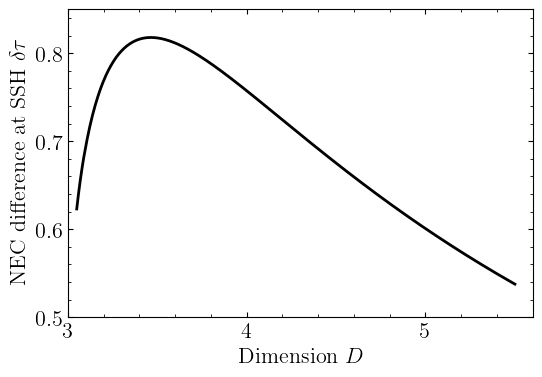

In [25]:
import numpy as np
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.colors as mcolors
from matplotlib.colors import BoundaryNorm, ListedColormap
from matplotlib import ticker
from scipy.optimize import curve_fit
from pylab import *
from scipy import ndimage
import json

# LaTeX font
plt.rcParams.update({
    "text.usetex": True,
    'font.size': 16
    })

# ---------------- Load Data ----------------
with open("NECdiffSSH.json", "r") as f:
    data = json.load(f)

NECdiff = np.array(data["NECdiff"])

# generating a figure
fig, ax=plt.subplots(sharex=True,facecolor='white',dpi=100,figsize=(6,4))
ax.set_xlim([3,5.6])
ax.set_ylim([0.5,0.85])
ax.tick_params(which='major', direction='in',top="true",right="true")
ax.tick_params(which='minor', direction='in',top="true",right="true")
ax.minorticks_on()
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
plt.xlabel(r'${\rm Dimension}~D$', fontsize = 16)
plt.ylabel(r'${\rm NEC~difference~at~SSH~\delta \tau }$',fontsize =  16)


plt.plot(NECdiff[:,0],NECdiff[:,1],color="black",linestyle="-",linewidth=2,zorder=1,alpha=1,label=r"$\rm this~work$")


plt.savefig("NECdiffSSH.pdf",dpi=100,bbox_inches='tight')

# NEC difference at SSH over Delta

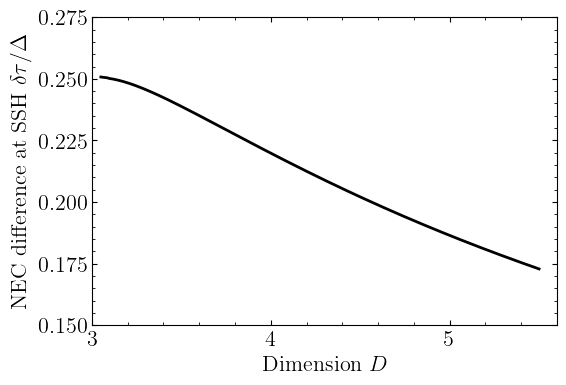

In [26]:
import numpy as np
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.colors as mcolors
from matplotlib.colors import BoundaryNorm, ListedColormap
from matplotlib import ticker
from scipy.optimize import curve_fit
from pylab import *
from scipy import ndimage
import json

# LaTeX font
plt.rcParams.update({
    "text.usetex": True,
    'font.size': 16
    })

# ---------------- Load Data ----------------
with open("NECdiffSSHoverDel.json", "r") as f:
    data = json.load(f)

NECdiff = np.array(data["NECdiff"])

# generating a figure
fig, ax=plt.subplots(sharex=True,facecolor='white',dpi=100,figsize=(6,4))
ax.set_xlim([3,5.6])
ax.set_ylim([0.15,0.275])
ax.tick_params(which='major', direction='in',top="true",right="true")
ax.tick_params(which='minor', direction='in',top="true",right="true")
ax.minorticks_on()
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
plt.xlabel(r'${\rm Dimension}~D$', fontsize = 16)
plt.ylabel(r'${\rm NEC~difference~at~SSH~\delta \tau /\Delta }$',fontsize =  16)


plt.plot(NECdiff[:,0],NECdiff[:,1],color="black",linestyle="-",linewidth=2,zorder=1,alpha=1,label=r"$\rm this~work$")


plt.savefig("NECdiffSSHoverDel.pdf",dpi=100,bbox_inches='tight')

# singular solution coefficient

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# LaTeX font
plt.rcParams.update({
    "text.usetex": True,
    'font.size': 16
    })

# numeric data for gamma 
delta=np.loadtxt("../complete_data/delta_sing.dat")
Ddelta=np.loadtxt("../complete_data/Ddelta_sing.dat")
deltafit=np.loadtxt("../complete_data/delta_sing_fit.dat")


# generating a figure
fig, ax = plt.subplots(sharex=True,facecolor='white',dpi=100,figsize=(6,4))
ax.set_xlim([3,5.5])
ax.set_ylim([-1.0,3.0])
ax.tick_params(which='major', direction='in',top="true",right="true")
ax.tick_params(which='minor', direction='in',top="true",right="true")
ax.minorticks_on()
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
plt.xlabel(r'${\rm Dimension}~D$', fontsize = 16)
plt.ylabel(r'${\rm Exponent}~\delta$',fontsize =  16)

# gamma
plt.plot(delta[:,0],delta[:,1],color="black",linestyle="-",linewidth=2,zorder=1,alpha=1,label=r"$\rm this~work$")
plt.plot(deltafit[:,0],deltafit[:,1],color="black",linestyle="--",linewidth=1,zorder=1,alpha=1,label=r"$\rm this~work$")

# Custom legend entries
handles = [
    Line2D([], [], color='k', linestyle="-", lw=2, label=r"$\textrm{Data}$"),
    Line2D([], [], color='k', linestyle="--", lw=1, label=r"$\textrm{Fit}$")
    
]

ax.legend(
    handles=handles,
    loc="upper left",
    frameon=False,
    framealpha=0.8,
    edgecolor="black"
)


plt.text(2.91,-0.4,r"$\bar{\delta }$",fontsize=16,color="black")
plt.text(4.7,-0.4,r"$\bar{\delta }=-0.302$",fontsize=16,color="black")


plt.savefig("delta_sing.pdf",dpi=100,bbox_inches='tight')

FileNotFoundError: ../complete_data/delta_sing.dat not found.

# singular solution coefficient with first derivative

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# LaTeX font
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 16
})

# numeric data
delta     = np.loadtxt("../complete_data/delta_sing.dat")
Ddelta    = np.loadtxt("../complete_data/Ddelta_sing.dat")
deltafit  = np.loadtxt("../complete_data/delta_sing_fit.dat")

# -----------------------
# Figure & subplots
# -----------------------
fig, (ax, axR) = plt.subplots(
    1, 2,
    sharex=False,
    figsize=(10, 4),
    dpi=100,
    facecolor='white',
    gridspec_kw={"width_ratios": [1, 1], "wspace": 0.3}
)

# -----------------------
# Left subplot: delta
# -----------------------
ax.set_xlim([3, 5.5])
ax.set_ylim([-1.0, 3.0])
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.minorticks_on()
ax.xaxis.set_major_locator(plt.MultipleLocator(1))

ax.set_xlabel(r'${\rm Dimension}~D$')
ax.set_ylabel(r'${\rm Exponent}~\delta$')

ax.plot(delta[:, 0], delta[:, 1], color="black", lw=2)
ax.plot(deltafit[:, 0], deltafit[:, 1], color="black", lw=1, ls="--")

ax.legend(
    handles=[
        Line2D([], [], color='k', lw=2, label=r"$\textrm{Data}$"),
        Line2D([], [], color='k', lw=1, ls="--", label=r"$\textrm{Fit}$")
    ],
    frameon=False,
    loc="upper left"
)

ax.text(2.88, -0.4, r"$\bar{\delta}$", fontsize=16)
ax.text(4.3, -0.4, r"$\bar{\delta}=-0.302$", fontsize=16)

# -----------------------
# Right subplot: Ddelta
# -----------------------
axR.set_xlim([3, 5.5])
axR.set_ylim([0.6, 1.4])
axR.tick_params(which='both', direction='in', top=True, right=True, left=True)
axR.minorticks_on()
axR.xaxis.set_major_locator(plt.MultipleLocator(1))

axR.plot(Ddelta[:, 0], Ddelta[:, 1], color="black", lw=2)
axR.set_xlabel(r'${\rm Dimension}~D$')
axR.set_ylabel(r'$\textrm{d}\delta / \textrm{d}D$')

plt.setp(axR.get_xticklabels(), visible=True)

# -----------------------
# Match aspect ratios
# -----------------------
#fig.canvas.draw()
#axR.set_box_aspect(ax.get_box_aspect())

# -----------------------
plt.savefig("delta_sing.pdf", dpi=100, bbox_inches='tight')
plt.show()


FileNotFoundError: ../complete_data/delta_sing.dat not found.

# NEC graphics 1

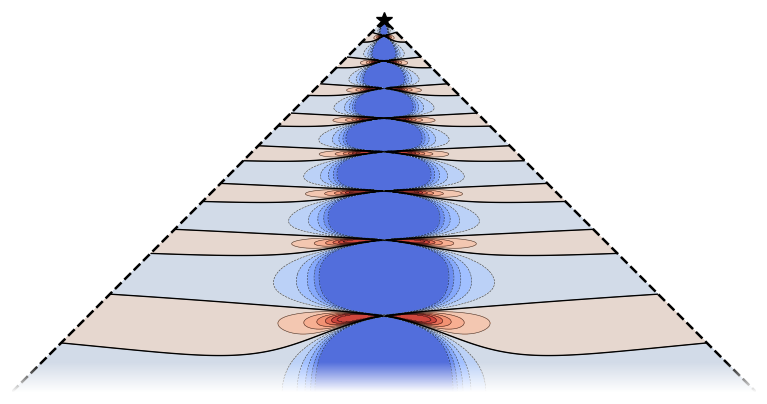

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
from matplotlib.colors import BoundaryNorm, ListedColormap
from scipy.ndimage import gaussian_filter
from matplotlib.path import Path

# LaTeX font
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 14
})

# --------------------------------------------------
# Load data
# --------------------------------------------------
data = np.loadtxt("fig1.dat")
x, y, z = data[:, 0], data[:, 1], data[:, 2]

# --------------------------------------------------
# Define triangle boundary (EDIT THESE)
# --------------------------------------------------
A = (-1.2, -0.2)
B = ( 1.2, -0.2)
C = ( 0.0, 1.0)

tri_vertices = np.array([A, B, C])
tri_path = Path(tri_vertices)

# --------------------------------------------------
# Triangulation + masking
# --------------------------------------------------
tri = mtri.Triangulation(x, y)

# mask triangles whose centroid is outside the triangle
tris = tri.triangles
xc = x[tris].mean(axis=1)
yc = y[tris].mean(axis=1)
tri.set_mask(~tri_path.contains_points(np.c_[xc, yc]))

# --------------------------------------------------
# Clip + smooth z (same as your code)
# --------------------------------------------------
#z_clipped = gaussian_filter(np.clip(z, -80, 160), sigma=0.9)
z_clipped = np.clip(z, -40, 40)

# --------------------------------------------------
# Levels and colormap (unchanged)
# --------------------------------------------------
levels = np.linspace(-40, 40, 13)

cmap = plt.get_cmap("coolwarm", len(levels) + 1)
cmap = cmap(np.linspace(0, 1, cmap.N))
open_cmap = ListedColormap(cmap)

open_cmap.set_under("#3B59C0")
open_cmap.set_over("#cf463d")

norm = BoundaryNorm(levels, open_cmap.N, extend="both")

# --------------------------------------------------
# Plot
# --------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 6), dpi=120)

contourf = ax.tricontourf(
    tri,
    z_clipped,
    levels=levels,
    cmap=open_cmap,
    norm=norm,
    extend="both"
)

# 1) thin contour lines at all levels
ax.tricontour(
    tri,
    z_clipped,
    levels=levels,
    colors="k",
    linewidths=0.35,
    alpha=0.7
)

# 2) thick zero contour
ax.tricontour(
    tri,
    z_clipped,
    levels=[0.0],
    colors="k",
    linewidths=0.8
)

# triangle boundary
ax.plot(*tri_vertices[[1,2,0]].T, color="k", lw=1.5, linestyle="--")

ax.set_xlim(-1.0, 1.0)
ax.set_ylim(0.0, 1.0)

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$\tau$")

# dot at the top of the triangle
ax.plot(
    C[0], C[1],
    marker="*",
    markersize=10,
    markerfacecolor="black",
    markeredgecolor="black",
    markeredgewidth=0.8,
    zorder=60,
    clip_on=False
)

# -----------------------------------
# --- bottom fade overlay (robust) ---
# ---------------------------------

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

fade_height = 0.08  # how far up the fade reaches in y-units
y0 = ymin
y1 = min(ymin + fade_height, ymax)

Ny = 400
Nx = 800  # wide enough so it covers smoothly

alpha = np.linspace(1.0, 0.0, Ny).reshape(Ny, 1)  # opaque at bottom -> transparent upward
alpha = np.repeat(alpha, Nx, axis=1)

# White RGBA image with varying alpha
rgba = np.ones((Ny, Nx, 4), dtype=float)
rgba[..., 3] = alpha  # set alpha channel

ax.imshow(
    rgba,
    extent=(xmin, xmax, y0, y1),
    origin="lower",
    interpolation="bicubic",
    zorder=50,
    aspect="auto",
)

# lock limits again (prevents any autoscale side-effects)
ax.set_xlim(-1.0, 1.0)
ax.set_ylim(0.0, 1.0)

ax.set_aspect("equal", adjustable="box")

ax.set_axis_off()

plt.savefig("fig1.pdf", dpi=200, bbox_inches="tight")
plt.show()


# NEC graphics 2

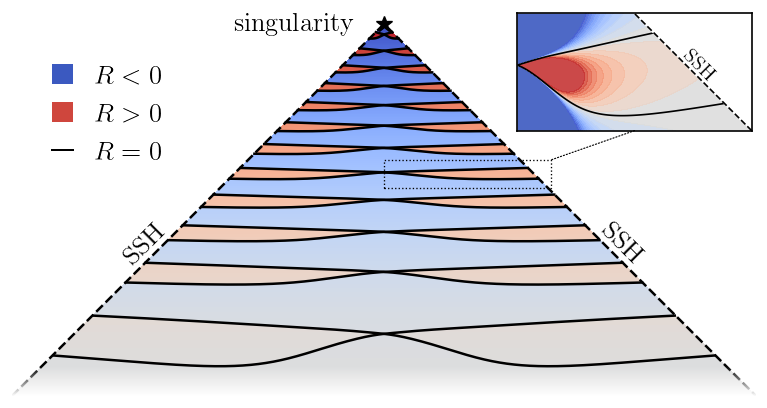

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
from matplotlib.colors import BoundaryNorm, ListedColormap
from scipy.ndimage import gaussian_filter
from matplotlib.path import Path
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from scipy.interpolate import griddata
from matplotlib.patches import Polygon
from matplotlib.patches import Rectangle
from matplotlib.patches import ConnectionPatch


# LaTeX font
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 16
})

# --------------------------------------------------
# Load data
# --------------------------------------------------
data = np.loadtxt("fig1_2.dat")
x, y, z = data[:, 0], data[:, 1], data[:, 2]

# --------------------------------------------------
# Define triangle boundary (EDIT THESE)
# --------------------------------------------------
A = (-1.2, -0.2)
B = ( 1.2, -0.2)
C = ( 0.0, 1.0)

tri_vertices = np.array([A, B, C])
tri_path = Path(tri_vertices)

# --------------------------------------------------
# Triangulation + masking
# --------------------------------------------------
tri = mtri.Triangulation(x, y)

# mask triangles whose centroid is outside the triangle
tris = tri.triangles
xc = x[tris].mean(axis=1)
yc = y[tris].mean(axis=1)
tri.set_mask(~tri_path.contains_points(np.c_[xc, yc]))

# --------------------------------------------------
# Clip + smooth z (same as your code)
# --------------------------------------------------
#z_clipped = gaussian_filter(np.clip(z, -80, 160), sigma=0.9)
z_clipped = np.clip(z, -40, 40)

# --------------------------------------------------
# Levels and colormap (unchanged)
# --------------------------------------------------
levels = np.linspace(-6, 6, 300)

cmap = plt.get_cmap("coolwarm", len(levels) + 1)
cmap = cmap(np.linspace(0, 1, cmap.N))
open_cmap = ListedColormap(cmap)

open_cmap.set_under("#173494")
open_cmap.set_over("#7a241e")

norm = BoundaryNorm(levels, open_cmap.N, extend="both")

# --------------------------------------------------
# Plot
# --------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 6), dpi=120)

# Plot field
contourf = ax.tricontourf(
    tri,
    z_clipped,
    levels=levels,
    cmap=open_cmap,
    norm=norm,
    extend="both"
)

# Plot NEC lines
with open("fig1_NECdata.dat") as f:
    blocks = f.read().strip().split("\n\n")

for block in blocks:
    NEC_data = np.loadtxt(block.splitlines())
    ax.plot(NEC_data[:,0], NEC_data[:,1], color="k", lw=1.5)


# triangle boundary
ax.plot(*tri_vertices[[1,2,0]].T, color="k", lw=1.5, linestyle="--")

ax.set_xlim(-1.0, 1.0)
ax.set_ylim(0.0, 1.0)

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$\tau$")

# dot at the top of the triangle
ax.plot(
    C[0], C[1],
    marker="*",
    markersize=10,
    markerfacecolor="black",
    markeredgecolor="black",
    markeredgewidth=0.8,
    zorder=60,
    clip_on=False
)

# -----------------------------------
# --- bottom fade overlay (robust) ---
# ---------------------------------

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

fade_height = 0.08  # how far up the fade reaches in y-units
y0 = ymin
y1 = min(ymin + fade_height, ymax)

Ny = 400
Nx = 800  # wide enough so it covers smoothly

alpha = np.linspace(1.0, 0.0, Ny).reshape(Ny, 1)  # opaque at bottom -> transparent upward
alpha = np.repeat(alpha, Nx, axis=1)

# White RGBA image with varying alpha
rgba = np.ones((Ny, Nx, 4), dtype=float)
rgba[..., 3] = alpha  # set alpha channel

ax.imshow(
    rgba,
    extent=(xmin, xmax, y0, y1),
    origin="lower",
    interpolation="bicubic",
    zorder=50,
    aspect="auto",
)

# lock limits again (prevents any autoscale side-effects)
ax.set_xlim(-1.0, 1.0)
ax.set_ylim(0.0, 1.0)


# ==================================================
# INSET (top-right)
# ==================================================
axins = inset_axes(
    ax,
    width="90%",   # size relative to parent axes
    height="90%",
    loc="upper right",
    borderpad=1.0,
    bbox_to_anchor=(0.68, 0.75, 0.35, 0.35),  # (x0, y0, w, h)
    bbox_transform=ax.transAxes
)

# loading data for Ricci scalar
data = np.loadtxt("fig1_inset.dat")

# rescaling of tau
x, y, z = data[:, 0], data[:, 1], data[:, 2]

# reshaping the grid
grid_shape = (500,500)
X = x.reshape(grid_shape)
Y = y.reshape(grid_shape)
Z = z.reshape(grid_shape)

# Clip z-values and Gaussian smoothing
#Z_clipped =  gaussian_filter(np.clip(Z, -180, 180),sigma=2)
Z_clipped = np.clip(Z, -40, 40)

# Set plot ranges
axins.set_xlim(0.00, 1)
axins.set_ylim(0., 0.3)

# Enable minor ticks
axins.minorticks_on()

# Customize minor tick parameters (optional)
axins.tick_params(axis='both', which='both', direction='in', width=1)
axins.tick_params(which='both', direction='in', width=1, top=True, right=True)
axins.tick_params(which='major', length=7, color='white')
axins.tick_params(which='minor', length=4, color='white')

# Define discrete levels for color mapping
levels = np.linspace(-40, 40, 20)

# Define a colormap with extended colors
cmap = plt.get_cmap("coolwarm", len(levels)+1)
cmap = cmap(np.linspace(0, 1, cmap.N))
open_cmap = ListedColormap(cmap)

#open_cmap = darken_coolwarm(strength=0.35, edge=0.2)
# Set colors for "under" and "over" values
open_cmap.set_under('#3B59C0')  # Color for values below the lowest level
open_cmap.set_over('#cf463d')     # Color for values above the highest level

# BoundaryNorm for color mapping
norm = BoundaryNorm(levels, open_cmap.N, extend='both')

# Add filled contours with the extended colormap
contourf = axins.contourf(X, Y, Z_clipped, levels=levels, cmap=open_cmap, extend='both', norm=norm, alpha=0.9)

# --------------------------------------------------
# Light-gray contour lines (all except zero)
# --------------------------------------------------
levels_lines = levels[levels != 0]

# --------------------------------------------------
# Thick zero contour line
# --------------------------------------------------
c0 = axins.contour(
    X, Y, Z_clipped,
    levels=[0.0],
    colors="black",
    linewidths=1.0,
    zorder=10
)

# Diagonal mask: bottom-right -> top-middle (in axes coords)
clip_poly = Polygon(
    [(0.0, 0.0), (1.0, 0.0), (0.5, 1.0), (0.0, 1.0)],
    closed=True,
    transform=axins.transAxes
)

# Hard white cover on the right side (guarantees no contour lines show there)
white_poly = Polygon(
    [(1.0, 0.0), (1.0, 1.0), (0.5, 1.0)],
    closed=True,
    facecolor='white',
    edgecolor='none',
    transform=axins.transAxes,
    zorder=19
)
axins.add_patch(white_poly)

# Clip the filled contours AND the separately plotted contour lines
# Clip the filled contours AND the separately plotted contour lines
for coll in contourf.collections:
    coll.set_clip_path(clip_poly)

for coll in c0.collections:  # <-- this is your black zero-contour QuadContourSet
    coll.set_clip_path(clip_poly) # <-- this is your black zero-contour QuadContourSet

# If you also have additional contour lines, clip them too:
# contour_lines.set_clip_path(clip_poly)

# Dashed boundary line
axins.plot(
    [1.0, 0.5], [0.0, 1.0],
    transform=axins.transAxes,
    linestyle='--',
    linewidth=1.2,
    color='white',
    zorder=20
)



# Keep the inset border on top (put this near your spine styling if you want)
for sp in axins.spines.values():
    sp.set_zorder(30)

# inset styling
axins.set_xticks([])
axins.set_yticks([])
for spine in axins.spines.values():
    spine.set_linewidth(1.0)


# ---------------------------------------------------------
# Mask right-hand side with diagonal:
# bottom-right (1,0) -> top-middle (0.5,1)
# ---------------------------------------------------------

# 1) Clip contourf to the LEFT of the diagonal
clip_poly = Polygon(
    [
        (0.0, 0.0),   # bottom-left
        (1.0, 0.0),   # bottom-right
        (0.5, 1.0),   # top-middle
        (0.0, 1.0)    # top-left
    ],
    closed=True,
    transform=axins.transAxes
)

# Clip the filled contours AND the separately plotted contour lines
for coll in contourf.collections:
    coll.set_clip_path(clip_poly)

for coll in c0.collections:  # <-- this is your black zero-contour QuadContourSet
    coll.set_clip_path(clip_poly)


# 2) White mask on the RIGHT of the diagonal
white_poly = Polygon(
    [
        (1.0, 0.0),   # bottom-right
        (1.0, 1.0),   # top-right
        (0.5, 1.0)    # top-middle
    ],
    closed=True,
    facecolor='white',
    edgecolor='none',
    transform=axins.transAxes,
    zorder=9
)
axins.add_patch(white_poly)

# 3) Dashed diagonal boundary line
axins.plot(
    [1.0, 0.5],
    [0.0, 1.0],
    transform=axins.transAxes,
    linestyle='--',
    linewidth=1,
    color='black',
    zorder=40
)
# Label along the dashed line
axins.text(
    0.775, 0.55,           # position in axes coords (adjust freely)
    r"$\textrm{SSH}$",
    transform=axins.transAxes,
    rotation=-45,       # matches the line
    fontsize=12,
    color='black',
    ha='center',
    va='center',
    zorder=45
)
# 4) Keep inset border thick
for spine in axins.spines.values():
    spine.set_linewidth(1.0)
    spine.set_zorder(20)

#----------------------
#-- ZOOM RECTANGLE-----
#----------------------

# --- YOU choose these ---
x1, x2 = 0.0, 0.45
y1, y2 = 0.56, 0.635

# Dotted rectangle in main plot
zoom_rect = Rectangle(
    (x1, y1),
    x2 - x1,
    y2 - y1,
    fill=False,
    edgecolor='black',
    linestyle=':',
    linewidth=0.8,
    zorder=40
)
ax.add_patch(zoom_rect)

# connect with inset

con = ConnectionPatch(
    xyA=(0.5, 0.0), coordsA=axins.transAxes,  # inset corner
    xyB=(x2, y2), coordsB=ax.transData,       # rectangle corner
    color='black',
    linestyle=':',
    linewidth=0.7,
    zorder=40
)

ax.figure.add_artist(con)

#----------------------------
#--- LEGEND ----------------
#--------------------------
legend_handles = [
    Patch(facecolor="#3B59C0", edgecolor="none",
          label=r"$R<0$"),
    
    Patch(facecolor="#cf463d", edgecolor="none",
          label=r"$R>0$"),
    
    Line2D([0], [0], color="black", lw=1.2,
           label=r"$R=0$")
]

# --------------------------------------------------
# Add legend (top-left corner)
# --------------------------------------------------
ax.legend(
    handles=legend_handles,
    loc="upper left",
    frameon=False,
    framealpha=0.95,
    fancybox=True,
    edgecolor="black",
    fontsize=16,
    borderpad=1,
    handlelength=0.8,
    handleheight=0.8,
    handletextpad=0.8
)

# Text labels
ax.text(
    -0.71, 0.34,                 # position in data coordinates
    r"$\textrm{SSH}$",
    rotation=45,            # degrees (counterclockwise)
    ha="left",              # horizontal alignment
    va="bottom"             # vertical alignment
)
ax.text(
    0.71, 0.34,                 # position in data coordinates
    r"$\textrm{SSH}$",
    rotation=-45,            # degrees (counterclockwise)
    ha="right",              # horizontal alignment
    va="bottom"             # vertical alignment
)
ax.text(
    -0.08, 0.97,                 # position in data coordinates
    r"$\textrm{singularity}$",
    rotation=0,            # degrees (counterclockwise)
    ha="right",              # horizontal alignment
    va="bottom"             # vertical alignment
)

ax.set_aspect("equal", adjustable="box")

ax.set_axis_off()

plt.savefig("fig1_2.png", dpi=500, bbox_inches="tight")
plt.show()


# NEC graphic 3

In [33]:
from matplotlib.collections import LineCollection

def smoothstep(t):
    # t in [0,1] -> smooth 0..1 with zero slope at ends
    return t*t*(3.0 - 2.0*t)

def rotated_nec_faded_collection(xr, yr, C, m, gamma=2.0, lw=1.5, side="left"):
    """
    side="left": show in left wedge (x<=Cx) above y=Cy + 1*(x-Cx)
    side="right": show in right wedge (x>=Cx) above y=Cy - 1*(x-Cx)
    Fade from the 45° boundary ray (visible) to a shallower ray (white).
    """
    Cx, Cy = C
    xr = np.asarray(xr)
    yr = np.asarray(yr)

    if side == "left":
        # rays through C: slope +1 and +m (m<1) for x<Cx
        y45 = Cy + 1.0*(xr - Cx)
        ysh = Cy + m  *(xr - Cx)
        mask = (xr <= Cx) & (yr >= y45)

    elif side == "right":
        # rays through C: slope -1 and -m for x>Cx
        y45 = Cy - 1.0*(xr - Cx)
        ysh = Cy - m  *(xr - Cx)
        mask = (xr >= Cx) & (yr >= y45)

    else:
        raise ValueError("side must be 'left' or 'right'")

    den = (ysh - y45)
    t = np.zeros_like(xr, dtype=float)
    good = den > 1e-12
    t[good] = (yr[good] - y45[good]) / den[good]
    t = np.clip(t, 0.0, 1.0)

    alpha_white = smoothstep(t)**gamma
    alpha_line = 1.0 - alpha_white

    # segments
    pts = np.column_stack([xr, yr])
    segs = np.stack([pts[:-1], pts[1:]], axis=1)

    keep = mask[:-1] & mask[1:]
    segs = segs[keep]
    a = 0.5*(alpha_line[:-1] + alpha_line[1:])[keep]

    colors = np.zeros((len(segs), 4), float)
    colors[:, :3] = 0.0
    colors[:, 3] = a

    lc = LineCollection(
        segs, colors=colors, linewidths=lw,
        capstyle="round", joinstyle="round", antialiaseds=True
    )
    return lc

def data_to_axes(ax, x, y):
    pts = np.column_stack([x, y])
    pts_disp = ax.transData.transform(pts)
    pts_axes = ax.transAxes.inverted().transform(pts_disp)
    return pts_axes[:, 0], pts_axes[:, 1]


['#3b4cc0', '#4a62d3', '#5978e3', '#6a8cf0', '#7b9ff9', '#8db0fe', '#9fbeff', '#b0cafc', '#c0d4f5', '#cfdaea', '#dddddd', '#e9d5ca', '#f2cbb7', '#f6bda3', '#f7ad8f', '#f49a7b', '#ee8468', '#e46d55', '#d75344', '#c63535', '#b40426']


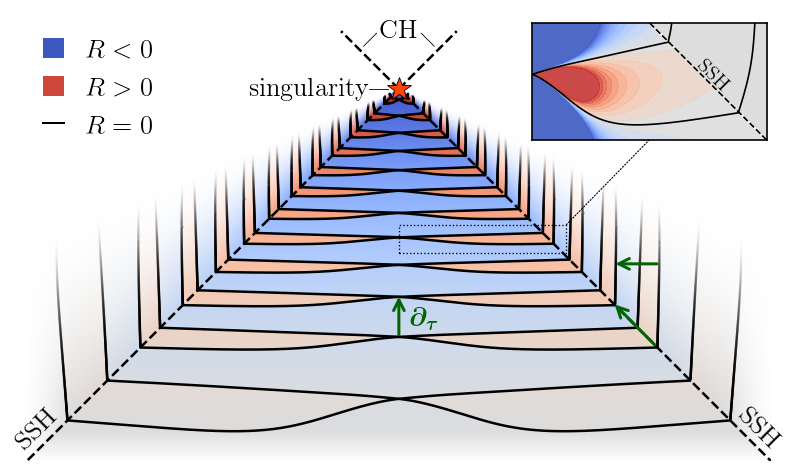

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
from matplotlib.colors import BoundaryNorm, ListedColormap
from matplotlib.path import Path
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.patches import Polygon
from matplotlib.patches import Rectangle
from matplotlib.patches import ConnectionPatch
from matplotlib.patches import Polygon
from matplotlib.colors import to_hex
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import FancyArrowPatch
from matplotlib.collections import LineCollection  # <-- ADD THIS IMPORT


# LaTeX font
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 16,
    "text.latex.preamble": r"\usepackage{amsmath}",
})

#==================================================
#=========== MAIN PLOT ==========================
#=============================================

# --------------------------------------------------
# Load data
# --------------------------------------------------
data = np.loadtxt("fig1_2.dat")
x, y, z = data[:, 0], data[:, 1], data[:, 2]

# --------------------------------------------------
# Define triangle boundary 
# --------------------------------------------------
A = (-1.2, -0.2)
B = ( 1.2, -0.2)
C = ( 0.0, 1.0)

tri_vertices = np.array([A, B, C])
tri_path = Path(tri_vertices)

# -----------------------------------------------------------------------------------
# fade parameters (used for white overlay AND NEC fade in the side wedges)
# ------------------------------------------------------------------------------
delta_deg = 22.0   # bigger = wider fade band; try 20..35
gamma = 0.6        # bigger = smoother/softer near the 45° line
m = np.tan(np.deg2rad(45.0 - delta_deg))  # slope of the shallower ray (must be < 1)


# --------------------------------------------------
# Triangulation + masking
# --------------------------------------------------
tri = mtri.Triangulation(x, y)

# mask triangles whose centroid is outside the triangle
tris = tri.triangles
xc = x[tris].mean(axis=1)
yc = y[tris].mean(axis=1)
tri.set_mask(~tri_path.contains_points(np.c_[xc, yc]))

# --------------------------------------------------
# Clip  z 
# --------------------------------------------------
z_clipped = np.clip(z, -40, 40)

# --------------------------------------------------
# Levels and colormap (unchanged)
# --------------------------------------------------
levels = np.linspace(-6, 6, 300)

cmap = plt.get_cmap("coolwarm", len(levels) + 1)
cmap = cmap(np.linspace(0, 1, cmap.N))
open_cmap = ListedColormap(cmap)

open_cmap.set_under("#173494")
open_cmap.set_over("#7a241e")

norm = BoundaryNorm(levels, open_cmap.N, extend="both")


# --------------------------------------------------
# ----------- PLOT MAIN WEDGE  ------------------
# --------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 6), dpi=120)

# Plot field
contourf = ax.tricontourf(
    tri,
    z_clipped,
    levels=levels,
    cmap=open_cmap,
    norm=norm,
    extend="both"
)

# --------------------------------------------------
# ------------- LEFT WEDGE ------------------------
# --------------------------------------------------
if True:
    Cx, Cy = C  # rotate about the apex (0,1)

    # 90° clockwise rotation about (Cx,Cy):
    # (dx,dy) -> (dy,-dx)
    x_rot = Cx + (y - Cy)
    y_rot = Cy - (x - Cx)

    # Reuse the same triangle connectivity as the original triangulation
    tri_rot = mtri.Triangulation(x_rot, y_rot, triangles=tri.triangles)

    # Define the LEFT wedge (above the left dashed 45° line y = x + 1):
    # within your visible box [-1,1]x[0,1], that's the triangle:
    P1 = (-1.0, 0.0)
    P2 = (-1.0, 1.0)
    P3 = ( 0.0, 1.0)
    wedge_path = Path(np.array([P1, P2, P3]))

    # Mask triangles whose centroid lies outside the wedge
    tris_r = tri_rot.triangles
    xc_r = x_rot[tris_r].mean(axis=1)
    yc_r = y_rot[tris_r].mean(axis=1)
    tri_rot.set_mask(~wedge_path.contains_points(np.c_[xc_r, yc_r]))

    # Plot the rotated field using the SAME z-values, levels, cmap, norm
    ax.tricontourf(
        tri_rot,
        z_clipped,
        levels=levels,
        cmap=open_cmap,
        norm=norm,
        extend="both",
        zorder=5   # pick a value below NEC lines, above background
    )



    # ==================================================
    # White overlay fade between rays from apex C: (LEFT)
    # y = 1 + x   (45°)         -> alpha_white = 0 (fully colored)
    # y = 1 + m x (shallower)   -> alpha_white = 1 (fully white)
    # ==================================================

    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()

    Nx, Ny = 900, 600
    xs = np.linspace(xmin, xmax, Nx)
    ys = np.linspace(ymin, ymax, Ny)
    XX, YY = np.meshgrid(xs, ys)

    Cx, Cy = C

    y45 = Cy + 1.0*(XX - Cx)   # 45° ray through C
    ysh = Cy + m  *(XX - Cx)   # shallower ray through C

    # apply only left of apex and above the 45° ray
    mask = (XX <= Cx) & (YY >= y45)

    den = (ysh - y45)
    t = np.zeros_like(XX)
    good = den > 1e-12
    t[good] = (YY[good] - y45[good]) / den[good]
    t = np.clip(t, 0.0, 1.0)

    alpha_white = smoothstep(t)**gamma
    alpha_white *= mask

    rgba = np.ones((Ny, Nx, 4), dtype=float)  # white overlay
    rgba[..., 3] = alpha_white

    ax.imshow(
        rgba,
        extent=(xmin, xmax, ymin, ymax),
        origin="lower",
        interpolation="bicubic",
        zorder=6,   # above rotated tricontourf; NEC lines are drawn later with higher zorder
        aspect="auto",
    )

# --------------------------------------------------
# ----- RIGHT WEDGE ---------------------------
# --------------------------------------------------
if True:
    Cx, Cy = C  # rotate about the apex (0,1)

    # 90° clockwise rotation about (Cx,Cy):
    # (dx,dy) -> (dy,-dx)
    x_rot = Cx - (y - Cy)
    y_rot = Cy + (x - Cx)

    # Reuse the same triangle connectivity as the original triangulation
    tri_rot = mtri.Triangulation(x_rot, y_rot, triangles=tri.triangles)

    # Define the LEFT wedge (above the left dashed 45° line y = x + 1):
    # within your visible box [-1,1]x[0,1], that's the triangle:
    P1 = ( 1.0, 0.0)
    P2 = ( 1.0, 1.0)
    P3 = ( 0.0, 1.0)
    wedge_path = Path(np.array([P1, P2, P3]))

    # Mask triangles whose centroid lies outside the wedge
    tris_r = tri_rot.triangles
    xc_r = x_rot[tris_r].mean(axis=1)
    yc_r = y_rot[tris_r].mean(axis=1)
    tri_rot.set_mask(~wedge_path.contains_points(np.c_[xc_r, yc_r]))

    # Plot the rotated field using the SAME z-values, levels, cmap, norm
    ax.tricontourf(
        tri_rot,
        z_clipped,
        levels=levels,
        cmap=open_cmap,
        norm=norm,
        extend="both",
        zorder=5   # pick a value below NEC lines, above background
    )

    # ==================================================
    # White overlay fade between rays from apex C: (RIGHT)
    # y = 1 - x   (-45°)         -> alpha_white = 0 (fully colored)
    # y = 1 - m x (shallower)   -> alpha_white = 1 (fully white)
    # ==================================================

    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()

    Nx, Ny = 900, 600
    xs = np.linspace(xmin, xmax, Nx)
    ys = np.linspace(ymin, ymax, Ny)
    XX, YY = np.meshgrid(xs, ys)

    Cx, Cy = C

    y45 = Cy - 1.0*(XX - Cx)   # 45° ray through C
    ysh = Cy - m  *(XX - Cx)   # shallower ray through C

    # apply only left of apex and above the 45° ray
    mask = (XX >= Cx) & (YY >= y45)

    den = (ysh - y45)
    t = np.zeros_like(XX)
    good = den > 1e-12
    t[good] = (YY[good] - y45[good]) / den[good]
    t = np.clip(t, 0.0, 1.0)

    alpha_white = smoothstep(t)**gamma
    alpha_white *= mask

    rgba = np.ones((Ny, Nx, 4), dtype=float)  # white overlay
    rgba[..., 3] = alpha_white

    ax.imshow(
        rgba,
        extent=(xmin, xmax, ymin, ymax),
        origin="lower",
        interpolation="bicubic",
        zorder=6,   # above rotated tricontourf; NEC lines are drawn later with higher zorder
        aspect="auto",
    )




# --------------
# Plot NEC lines
# ---------------

with open("fig1_NECdata.dat") as f:
    blocks = f.read().strip().split("\n\n")

for block in blocks:
    NEC_data = np.loadtxt(block.splitlines())
    xn, yn = NEC_data[:, 0], NEC_data[:, 1]

    # Original NEC lines (bottom triangle)
    ax.plot(xn, yn, color="k", lw=1.5, zorder=20)

    Cx, Cy = C

    # Rotated NEC lines (left wedge)
    xr_left = Cx + (yn - Cy)
    yr_left = Cy - (xn - Cx)

    lc_left = rotated_nec_faded_collection(xr_left, yr_left, C=C, m=m, gamma=gamma, lw=1.5, side="left")
    lc_left.set_zorder(20)
    ax.add_collection(lc_left)

    # Rotated NEC lines (right wedge)
    xr_right = Cx - (yn - Cy)
    yr_right = Cy + (xn - Cx)

    lc_right = rotated_nec_faded_collection(xr_right, yr_right, C=C, m=m, gamma=gamma, lw=1.5, side="right")
    lc_right.set_zorder(20)
    ax.add_collection(lc_right)


#------------------------------------------
# DASHED LINES for SSH and CAUCHY HORIZON
#-----------------------------------------
ax.plot(*tri_vertices[[1,2,0]].T, color="k", lw=1.5, linestyle="--", zorder = 80)

ax.set_xlim(-1.0, 1.0)
ax.set_ylim(0.0, 1.0)

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$\tau$")

# Short dashed 45° ray from C to top-left + label
Cx, Cy = C

L = 0.22  # length of the short segment in data units (tune)
dx = L / np.sqrt(2.0)
dy = dx

# dashed segment
ax.plot(
    [Cx, Cx - dx], [Cy, Cy + dy],
    color="k",
    lw=1.5,
    linestyle="--",
    zorder=85,
    clip_on=False
)
ax.plot(
    [Cx, Cx + dx], [Cy, Cy + dy],
    color="k",
    lw=1.5,
    linestyle="--",
    zorder=85,
    clip_on=False
)

# -----------------------------------
# --- bottom fade overlay  -------
# ---------------------------------
if True:
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()

    fade_height = 0.08  # how far up the fade reaches in y-units
    y0 = ymin
    y1 = min(ymin + fade_height, ymax)

    Ny = 400
    Nx = 800  # wide enough so it covers smoothly

    alpha = np.linspace(1.0, 0.0, Ny).reshape(Ny, 1)  # opaque at bottom -> transparent upward
    alpha = np.repeat(alpha, Nx, axis=1)

    # White RGBA image with varying alpha
    rgba = np.ones((Ny, Nx, 4), dtype=float)
    rgba[..., 3] = alpha  # set alpha channel

    ax.imshow(
        rgba,
        extent=(xmin, xmax, y0, y1),
        origin="lower",
        interpolation="bicubic",
        zorder=50,
        aspect="auto",
    )

    # lock limits again (prevents any autoscale side-effects)
    ax.set_xlim(-1.0, 1.0)
    ax.set_ylim(0.0, 1.0)

# -----------------------------------
# --- left-edge fade overlay  -------
# -----------------------------------
if True:
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()

    fade_width = 0.12  # how far right the fade reaches in x-units (tune)
    x0 = xmin
    x1 = min(xmin + fade_width, xmax)

    Ny = 800
    Nx = 400   # vertical strip, so fewer x pixels needed

    alpha = np.linspace(1.0, 0.0, Nx).reshape(1, Nx)  # opaque at left -> transparent to the right
    alpha = np.repeat(alpha, Ny, axis=0)

    rgba = np.ones((Ny, Nx, 4), dtype=float)
    rgba[..., 3] = alpha

    im_leftfade = ax.imshow(
        rgba,
        extent=(x0, x1, ymin, ymax),
        origin="lower",
        interpolation="bicubic",
        zorder=7,      # above rotated field + diagonal fade; below NEC lines
        aspect="auto",
    )

    # Clip this fade strip to the left triangle only (above y=x+1, left of x=0)
    left_tri_clip = Polygon(
        [(-1.0, 0.0), (-1.0, 1.0), (0.0, 1.0)],
        closed=True,
        transform=ax.transData
    )
    im_leftfade.set_clip_path(left_tri_clip)

# -----------------------------------
# --- right-edge fade overlay  -------
# -----------------------------------
if True:
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()

    fade_width = 0.12  # how far left the fade reaches from the right boundary
    x0 = max(xmax - fade_width, xmin)
    x1 = xmax

    Ny = 800
    Nx = 400

    # opaque at RIGHT boundary -> transparent to the LEFT
    alpha = np.linspace(0.0, 1.0, Nx).reshape(1, Nx)   # 0 on left of strip, 1 on right
    alpha = np.repeat(alpha, Ny, axis=0)

    rgba = np.ones((Ny, Nx, 4), dtype=float)
    rgba[..., 3] = alpha

    im_rightfade = ax.imshow(
        rgba,
        extent=(x0, x1, ymin, ymax),   # increasing extent
        origin="lower",
        interpolation="bicubic",
        zorder=7,
        aspect="auto",
    )

    # Clip to RIGHT wedge triangle: (0,1), (1,0), (1,1) in your axes box
    right_tri_clip = Polygon(
        [(0.0, 1.0), (1.0, 0.0), (1.0, 1.0)],
        closed=True,
        transform=ax.transData
    )
    im_rightfade.set_clip_path(right_tri_clip)

# ==================================================
# INSET (top-right)
# ==================================================
axins = inset_axes(
    ax,
    width="90%",   # size relative to parent axes
    height="90%",
    loc="upper right",
    borderpad=1.0,
    bbox_to_anchor=(0.68, 0.9, 0.35, 0.35),  # (x0, y0, w, h)
    bbox_transform=ax.transAxes
)

# loading data for Ricci scalar
data = np.loadtxt("fig1_inset.dat")

# rescaling of tau
x, y, z = data[:, 0], data[:, 1], data[:, 2]

# reshaping the grid
grid_shape = (500,500)
X = x.reshape(grid_shape)
Y = y.reshape(grid_shape)
Z = z.reshape(grid_shape)

# Clip z-values and Gaussian smoothing
#Z_clipped =  gaussian_filter(np.clip(Z, -180, 180),sigma=2)
Z_clipped = np.clip(Z, -40, 40)

# Set plot ranges
axins.set_xlim(0.00, 1)
axins.set_ylim(0., 0.3)

# Enable minor ticks
axins.minorticks_on()

# Customize minor tick parameters (optional)
axins.tick_params(axis='both', which='both', direction='in', width=1)
axins.tick_params(which='both', direction='in', width=1, top=True, right=True)
axins.tick_params(which='major', length=7, color='white')
axins.tick_params(which='minor', length=4, color='white')

# Define discrete levels for color mapping
levels = np.linspace(-40, 40, 20)

# Define a colormap with extended colors
cmap = plt.get_cmap("coolwarm", len(levels)+1)
cmap = cmap(np.linspace(0, 1, cmap.N))
open_cmap = ListedColormap(cmap)

hex_colors = [to_hex(c) for c in cmap]
print(hex_colors)

#open_cmap = darken_coolwarm(strength=0.35, edge=0.2)
# Set colors for "under" and "over" values
open_cmap.set_under('#3B59C0')  # Color for values below the lowest level
open_cmap.set_over('#cf463d')     # Color for values above the highest level

# BoundaryNorm for color mapping
norm = BoundaryNorm(levels, open_cmap.N, extend='both')

# Add filled contours with the extended colormap
contourf = axins.contourf(X, Y, Z_clipped, levels=levels, cmap=open_cmap, extend='both', norm=norm, alpha=0.9)

# --------------------------------------------------
# Light-gray contour lines (all except zero)
# --------------------------------------------------
levels_lines = levels[levels != 0]

# --------------------------------------------------
# Thick zero contour line
# --------------------------------------------------
c0 = axins.contour(
    X, Y, Z_clipped,
    levels=[0.0],
    colors="black",
    linewidths=1.0,
    zorder=10
)

# Diagonal mask: bottom-right -> top-middle (in axes coords)
clip_poly = Polygon(
    [(0.0, 0.0), (1.0, 0.0), (0.5, 1.0), (0.0, 1.0)],
    closed=True,
    transform=axins.transAxes
)

# Hard white cover on the right side (guarantees no contour lines show there)
white_poly = Polygon(
    [(1.0, 0.0), (1.0, 1.0), (0.5, 1.0)],
    closed=True,
    facecolor="#dddddd",
    edgecolor='none',
    transform=axins.transAxes,
    zorder=19
)
axins.add_patch(white_poly)

# Clip the filled contours AND the separately plotted contour lines
# Clip the filled contours AND the separately plotted contour lines
for coll in contourf.collections:
    coll.set_clip_path(clip_poly)

for coll in c0.collections:  # <-- this is your black zero-contour QuadContourSet
    coll.set_clip_path(clip_poly)


# If you also have additional contour lines, clip them too:
# contour_lines.set_clip_path(clip_poly)

# Dashed boundary line
axins.plot(
    [1.0, 0.5], [0.0, 1.0],
    transform=axins.transAxes,
    linestyle='--',
    linewidth=1.2,
    color='white',
    zorder=20
)



# Keep the inset border on top (put this near your spine styling if you want)
for sp in axins.spines.values():
    sp.set_zorder(30)

# inset styling
axins.set_xticks([])
axins.set_yticks([])
for spine in axins.spines.values():
    spine.set_linewidth(1.0)


# ---------------------------------------------------------
# Mask right-hand side with diagonal:
# bottom-right (1,0) -> top-middle (0.5,1)
# ---------------------------------------------------------

# 1) Clip contourf to the LEFT of the diagonal
clip_poly = Polygon(
    [
        (0.0, 0.0),   # bottom-left
        (1.0, 0.0),   # bottom-right
        (0.5, 1.0),   # top-middle
        (0.0, 1.0)    # top-left
    ],
    closed=True,
    transform=axins.transAxes
)
# Clip the filled contours AND the separately plotted contour lines
for coll in contourf.collections:
    coll.set_clip_path(clip_poly)

for coll in c0.collections:  # <-- this is your black zero-contour QuadContourSet
    coll.set_clip_path(clip_poly)


# 2) White mask on the RIGHT of the diagonal
white_poly = Polygon(
    [
        (1.0, 0.0),   # bottom-right
        (1.0, 1.0),   # top-right
        (0.5, 1.0)    # top-middle
    ],
    closed=True,
    facecolor='white',
    edgecolor='none',
    transform=axins.transAxes,
    zorder=9
)
axins.add_patch(white_poly)

# 3) Dashed diagonal boundary line
axins.plot(
    [1.0, 0.5],
    [0.0, 1.0],
    transform=axins.transAxes,
    linestyle='--',
    linewidth=1,
    color='black',
    zorder=40
)
# Label along the dashed line
axins.text(
    0.775, 0.55,           # position in axes coords (adjust freely)
    r"$\textrm{SSH}$",
    transform=axins.transAxes,
    rotation=-45,       # matches the line
    fontsize=12,
    color='black',
    ha='center',
    va='center',
    zorder=45
)
# 4) Keep inset border thick
for spine in axins.spines.values():
    spine.set_linewidth(1.0)
    spine.set_zorder(20)

# 5) Draw mirrored region in outer patch
# first curved line
t = np.linspace(0, 1, 50)
axins.plot(
    0.58 + (0.59 - 0.58)*t + 0.005*np.sin(np.pi*t/2),
    0.25 + (0.297 - 0.25)*t,
    color="black",
    lw=1.0,
    zorder=80,
    clip_on=False
)

# second curved line
t = np.linspace(0, 1, 50)
axins.plot(
    0.88 + (0.95 - 0.88)*t + 0.015*np.sin(np.pi*t),
    0.07 + (0.297 - 0.07)*t,
    color="black",
    lw=1.0,
    zorder=80,
    clip_on=False
)

# 6) fill region between NEC lines in outer patch
t = np.linspace(0, 1, 200)

# curve 1 (data coords)
x1 = 0.58 + (0.59 - 0.58)*t + 0.005*np.sin(np.pi*t/2)
y1 = 0.25 + (0.299 - 0.25)*t

# curve 2 (data coords)
x2 = 0.88 + (0.95 - 0.88)*t + 0.015*np.sin(np.pi*t)
y2 = 0.07 + (0.299 - 0.07)*t

# curve 3 (data coords)
x3 = 0.59 + (0.95 - 0.59)*t 
y3 = [0.299] * 200

# curve 4 (data coords)
x4 = 0.88 + (0.58 - 0.88)*t 
y4 = 0.07 + (0.25 - 0.07)*t

# convert to axes coords (so we can combine with dashed line)
x1a, y1a = data_to_axes(axins, x1, y1)
x2a, y2a = data_to_axes(axins, x2, y2)
x3a, y3a = data_to_axes(axins, x3, y3)
x4a, y4a = data_to_axes(axins, x4, y4)

poly = np.vstack([
    np.column_stack([x1a,        y1a       ]),   # curve 1
    np.column_stack([x3a,        y3a       ]),   # curve 3
    np.column_stack([x2a[::-1],  y2a[::-1] ]),   # curve 2 (reversed)
    np.column_stack([x4a,        y4a       ])    # curve 4
])

patch = Polygon(poly, closed=True, transform=axins.transAxes,
                facecolor="#dddddd", edgecolor="none", zorder=20)
axins.add_patch(patch)

#----------------------
#-- ZOOM RECTANGLE-----
#----------------------

# --- YOU choose these ---
x1, x2 = 0.0, 0.45
y1, y2 = 0.56, 0.635

# Dotted rectangle in main plot
zoom_rect = Rectangle(
    (x1, y1),
    x2 - x1,
    y2 - y1,
    fill=False,
    edgecolor='black',
    linestyle=':',
    linewidth=0.8,
    zorder=40
)
ax.add_patch(zoom_rect)

# connect with inset

con = ConnectionPatch(
    xyA=(0.5, 0.0), coordsA=axins.transAxes,  # inset corner
    xyB=(x2, y2), coordsB=ax.transData,       # rectangle corner
    color='black',
    linestyle=':',
    linewidth=0.7,
    zorder=40
)

ax.figure.add_artist(con)

#----------------------------
#--- LEGEND ----------------
#--------------------------
legend_handles = [
    Patch(facecolor="#3B59C0", edgecolor="none",
          label=r"$R<0$"),
    
    Patch(facecolor="#cf463d", edgecolor="none",
          label=r"$R>0$"),
    
    Line2D([0], [0], color="black", lw=1.2,
           label=r"$R=0$")
]

leg = ax.legend(
    handles=legend_handles,
    loc="upper left",
    bbox_to_anchor=(0.1, 0.88),
    bbox_transform=fig.transFigure,
    frameon=False,
    framealpha=0.95,
    fancybox=True,
    edgecolor="black",
    fontsize=16,
    borderpad=1,
    handlelength=0.8,
    handleheight=0.8,
    handletextpad=0.8
)

leg.set_zorder(100)

#-----------------------------
# Text labels and annotations
#-------------------------------
if True:
    ax.text(
        -1.04, 0.02,                 # position in data coordinates
        r"$\textrm{SSH}$",
        rotation=45,            # degrees (counterclockwise)
        ha="left",              # horizontal alignment
        va="bottom",             # vertical alignment
        zorder = 50
    )
    ax.text(
        1.04, 0.02,                 # position in data coordinates
        r"$\textrm{SSH}$",
        rotation=-45,            # degrees (counterclockwise)
        ha="right",              # horizontal alignment
        va="bottom",             # vertical alignment
        zorder = 50
    )
    ax.text(
        -0.08, 0.97,                 # position in data coordinates
        r"$\textrm{singularity}$",
        rotation=0,            # degrees (counterclockwise)
        ha="right",              # horizontal alignment
        va="bottom",             # vertical alignment
        zorder = 50
    )
    ax.text(
        -0.05, 1.14,                 # position in data coordinates
        r"$\textrm{CH}$",
        rotation=0,              
        zorder = 50
    )
    ax.plot(
        [-0.095, -0.06],   # x1, x2
        [1.115, 1.15],     # y1, y2
        color="black",
        lw=0.5,        
        zorder=80,
        clip_on=False
    )
    ax.plot(
        [0.095, 0.06],   # x1, x2
        [1.115, 1.15],     # y1, y2
        color="black",
        lw=0.5,        
        zorder=80,
        clip_on=False
    )
    ax.plot(
        [-0.08, -0.03],   # x1, x2
        [1, 1],     # y1, y2
        color="black",
        lw=0.5,        
        zorder=80,
        clip_on=False
    )
    # dot at the top of the triangle
    ax.plot(
        C[0], C[1],
        marker="*",
        markersize=15,
        markerfacecolor="orangered",
        markeredgecolor="black",
        markeredgewidth=0.5,
        zorder=100,
        clip_on=False
    )
    # draw crystal vector
    # timlike
    ax.annotate(
    '',
    xy=(0.5, 0.4419),      # arrow tip
    xytext=(0.5, 0.34), # tail
    xycoords=ax.transAxes,   # or 'data'
    arrowprops=dict(
        arrowstyle='->',
        lw=1.8,
        color='darkgreen',
        shrinkA=0,
        shrinkB=0
    ),
    zorder=300,
    clip_on=False
    )
    # null
    ax.annotate(
    '',
    xy=(0.79, 0.421),      # arrow tip
    xytext=(0.844, 0.312), # tail
    xycoords=ax.transAxes,   # or 'data'
    arrowprops=dict(
        arrowstyle='->',
        lw=1.8,
        color='darkgreen',
        shrinkA=0,
        shrinkB=0
    ),
    zorder=300,
    clip_on=False
    )
    # spacelike
    ax.annotate(
    '',
    xy=(0.791, 0.53),      # arrow tip
    xytext=(0.847, 0.53), # tail
    xycoords=ax.transAxes,   # or 'data'
    arrowprops=dict(
        arrowstyle='->',
        lw=1.8,
        color='darkgreen',
        shrinkA=0,
        shrinkB=0
    ),
    zorder=300,
    clip_on=False
    )
    ax.text(
        0.03, 0.365,                 # position in data coordinates
        r"$\boldsymbol{\partial_\tau}$",
        color='darkgreen',
        rotation=0,              
        zorder = 50
    )
    
ax.set_aspect("equal", adjustable="box")

ax.set_axis_off()

plt.savefig("fig1_3.png", dpi=500, bbox_inches="tight")
plt.show()
